Enter the path of your dataset: /content/fifa21_cleaned_data.csv

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  18979 non-null  int64 
 1   Nationality         18979 non-null  object
 2   Age                 18979 non-null  int64 
 3   OVA                 18979 non-null  object
 4   POT                 18979 non-null  object
 5   Club                18979 non-null  object
 6   Contract Status     18979 non-null  object
 7   Height (cm)         18979 non-null  int64 
 8   Weight (kg)         18979 non-null  int64 
 9   Preferred Foot      18979 non-null  object
 10  BOV                 18979 non-null  object
 11  Best Position       18979 non-null  object
 12  Joined              18979 non-null  object
 13  Loan Date End       18979 non-null  object
 14  Value (€)           18979 non-null

/tmp/ipython-input-2663361585.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2663361585.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Data Shape after cleaning: (18979, 73)


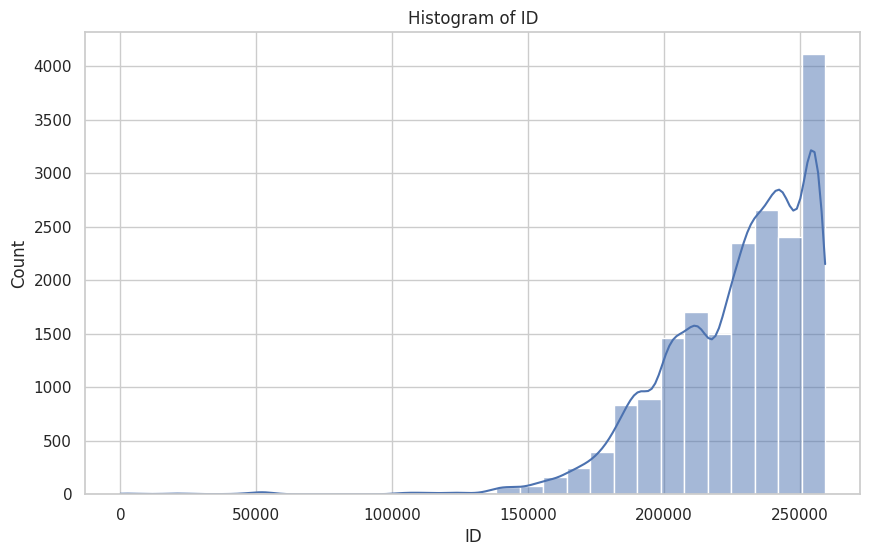

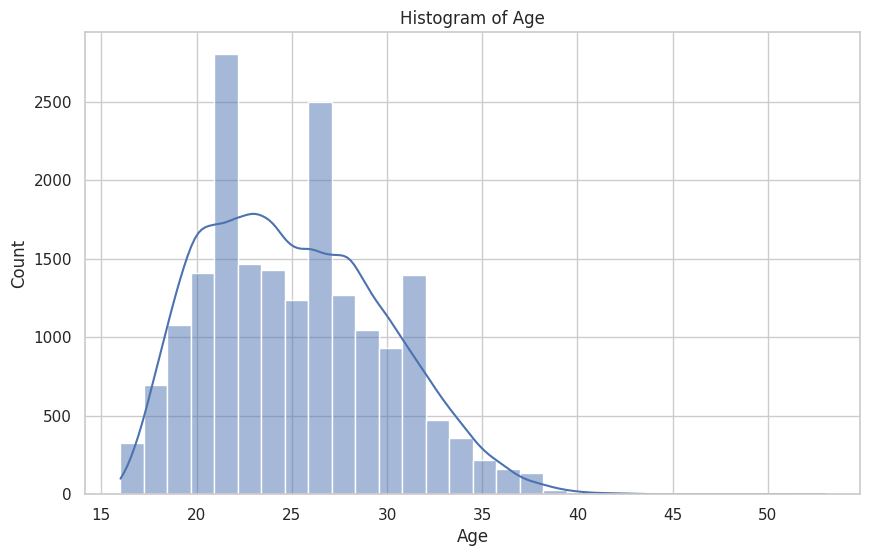

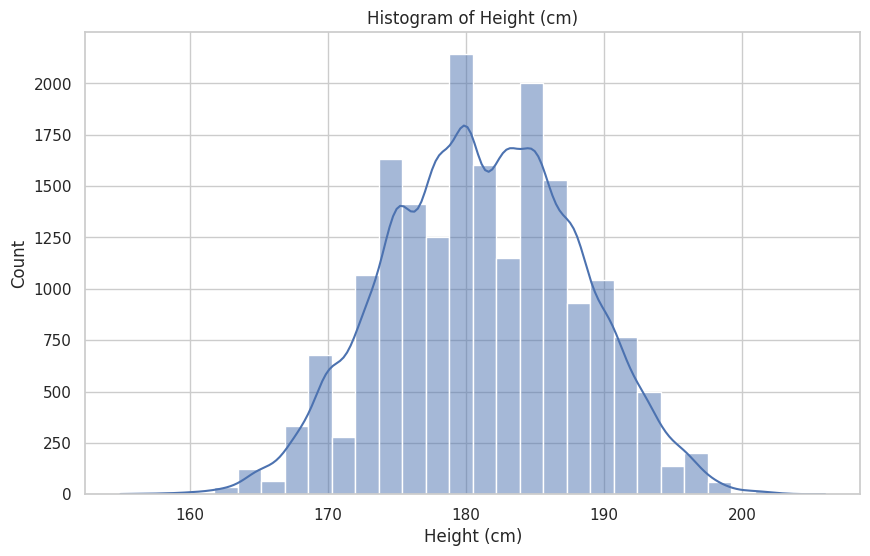

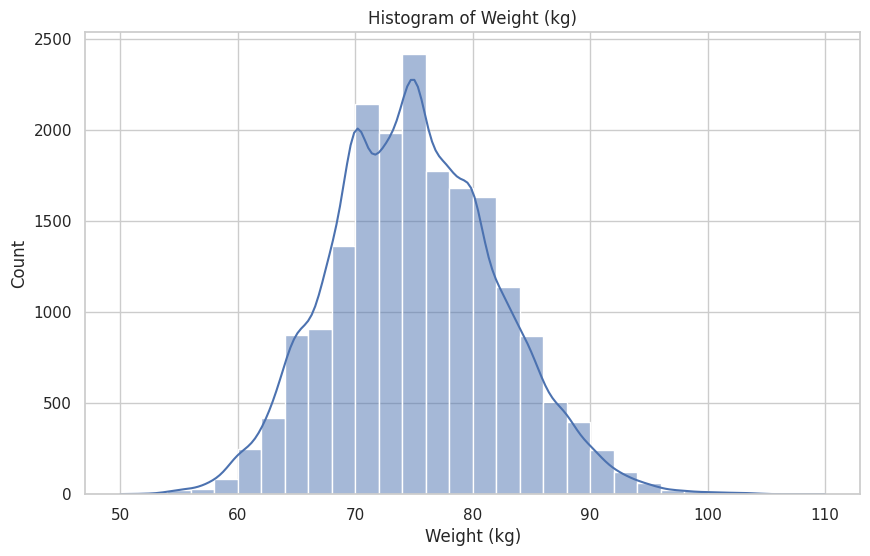

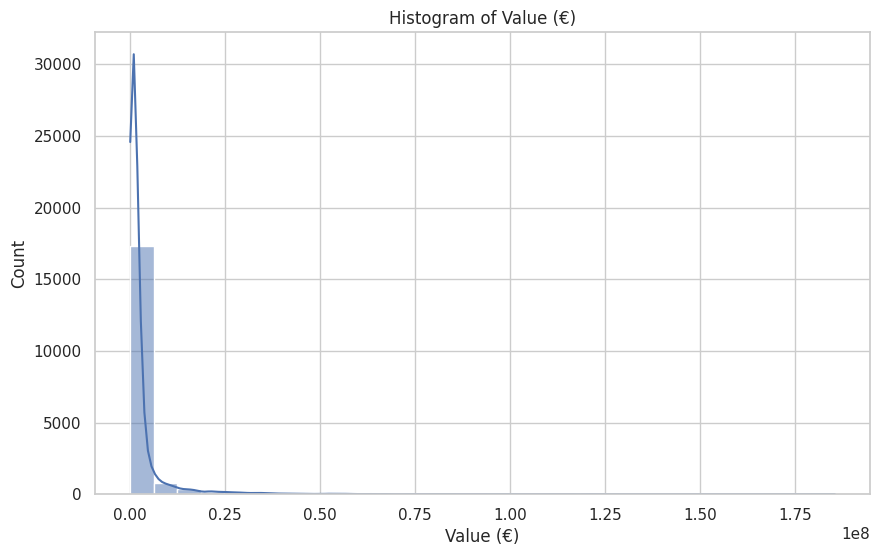

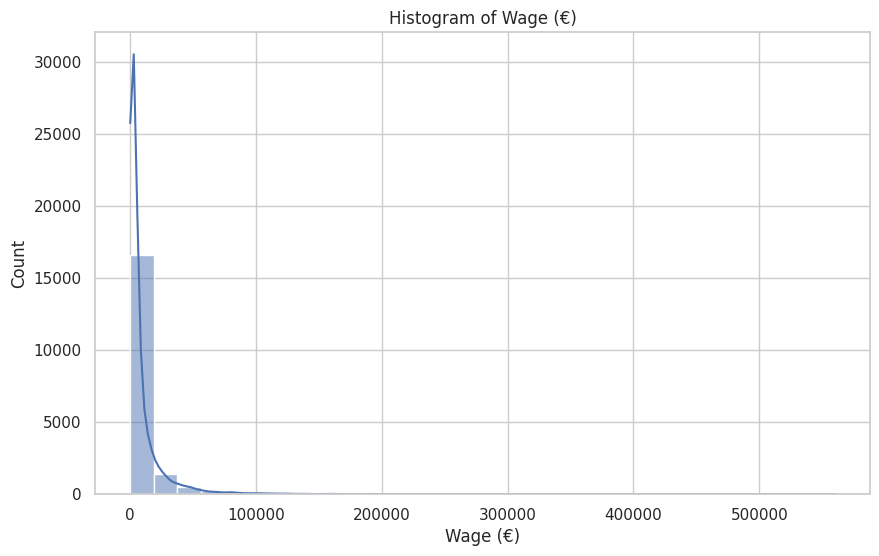

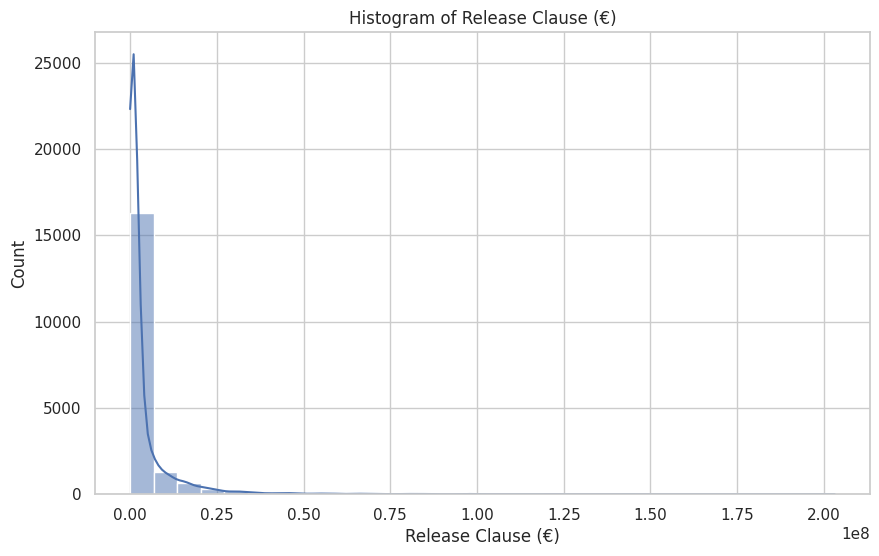

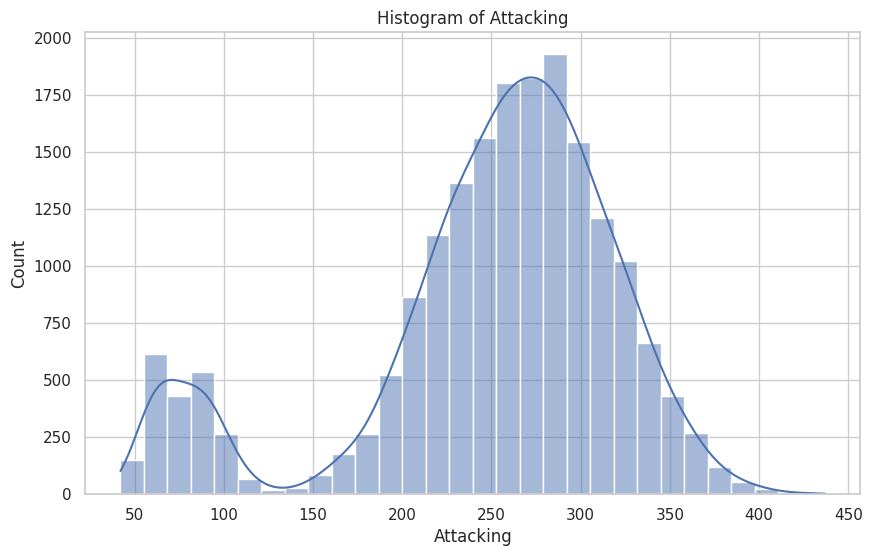

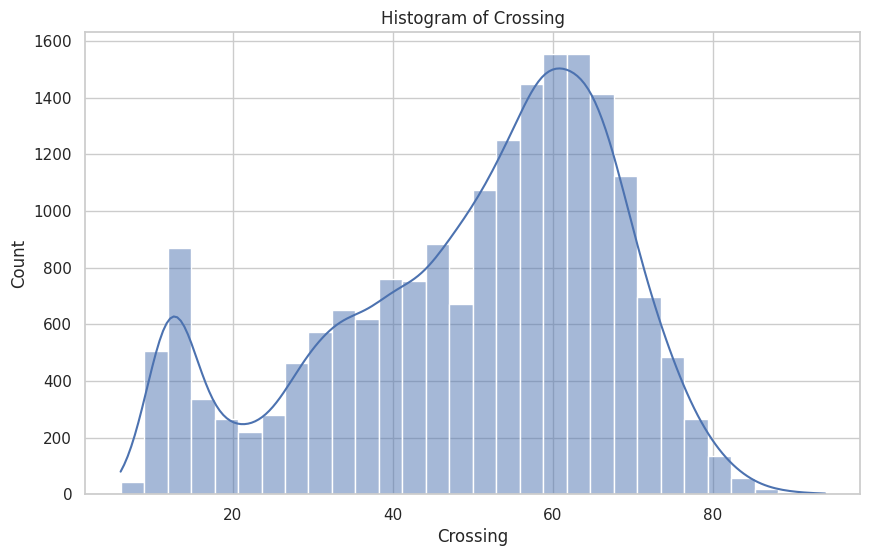

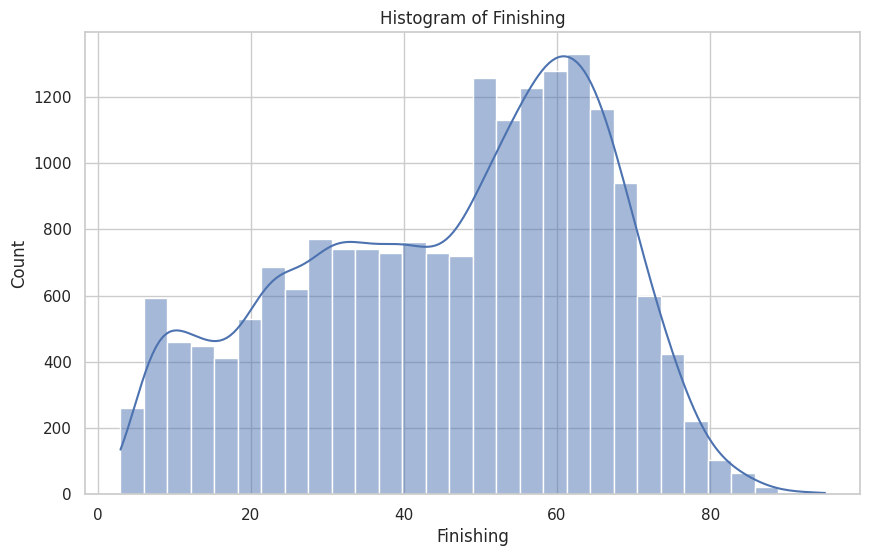

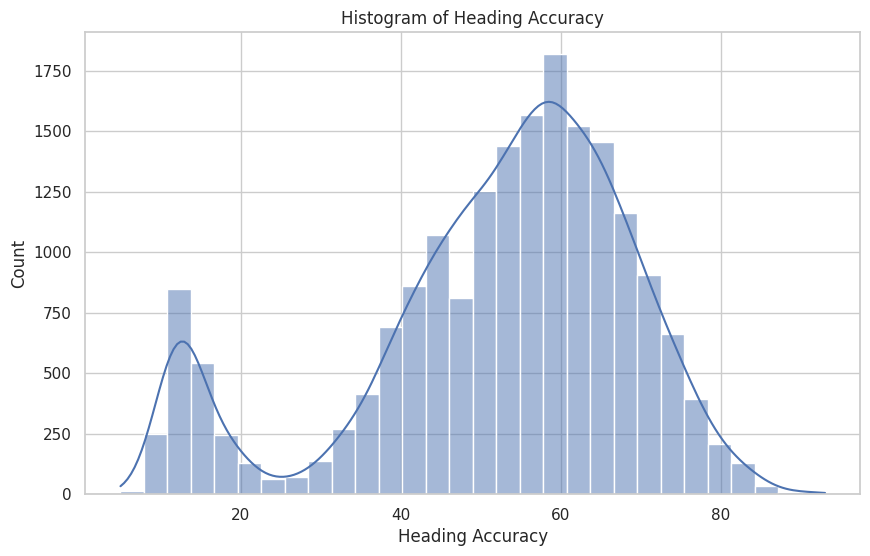

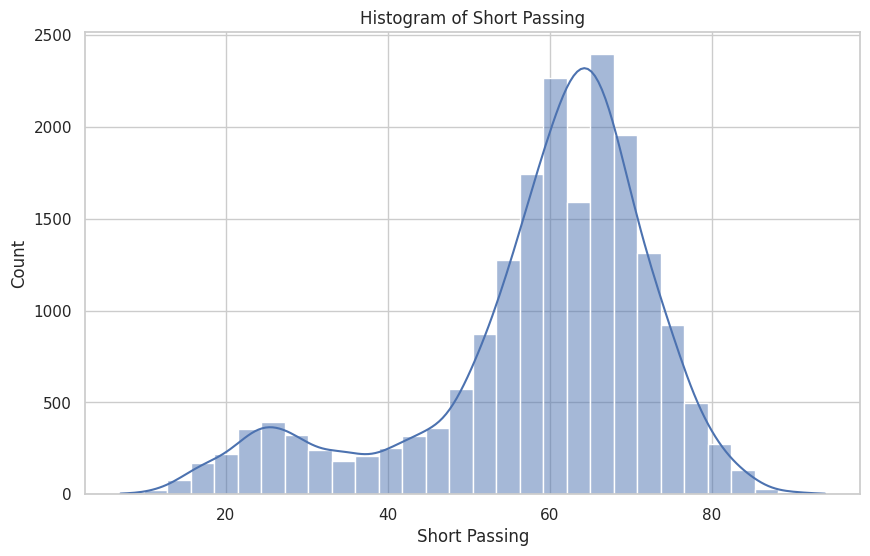

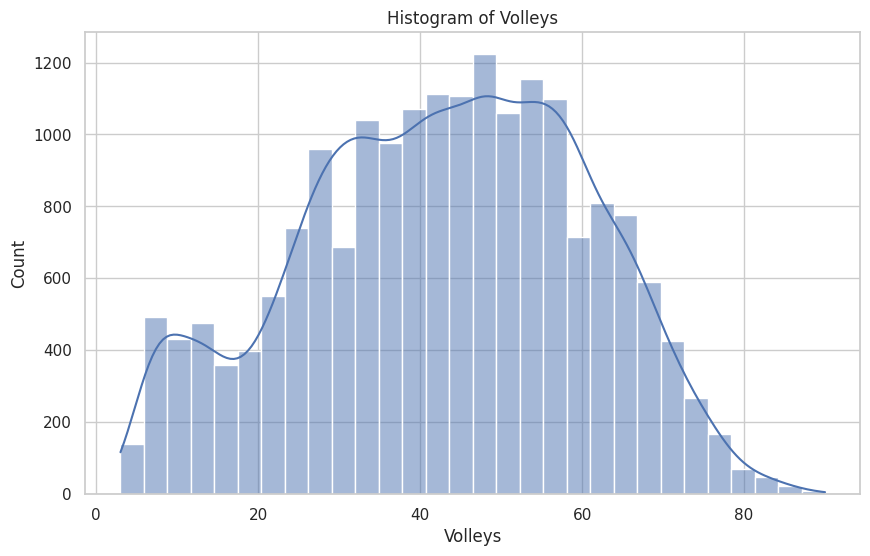

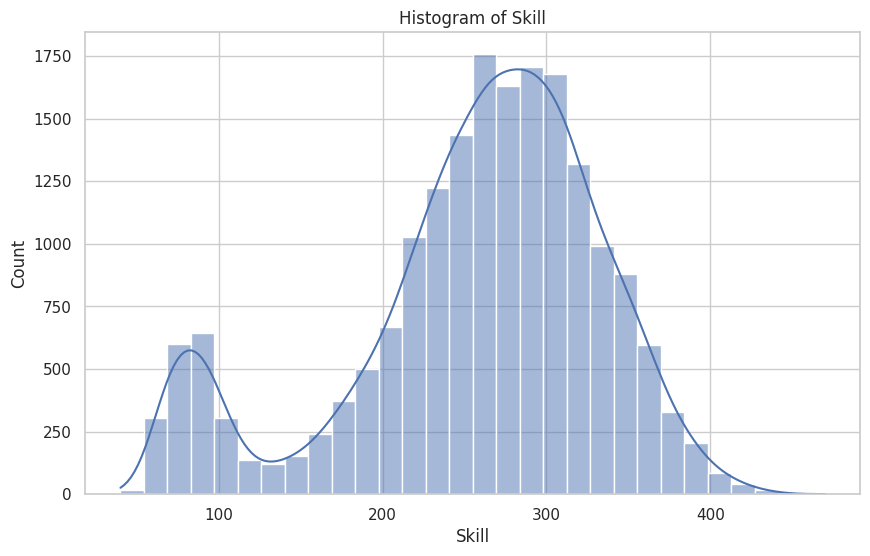

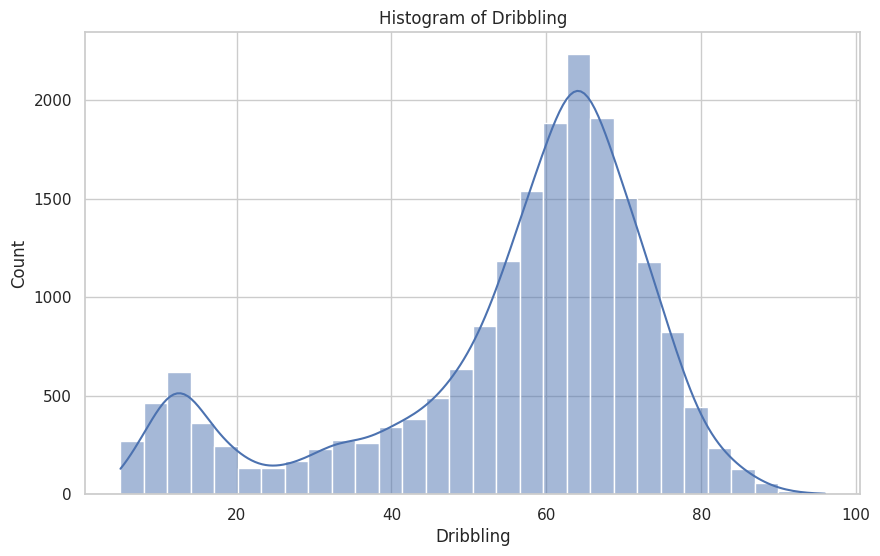

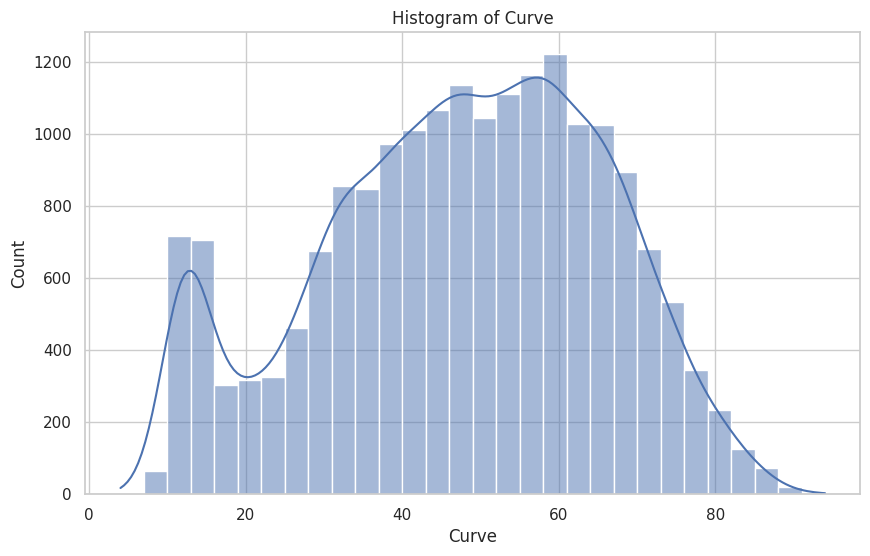

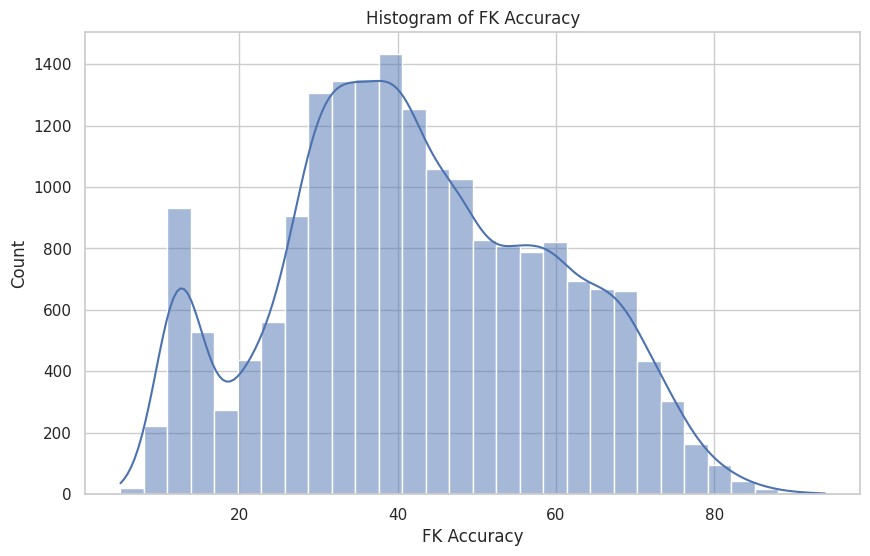

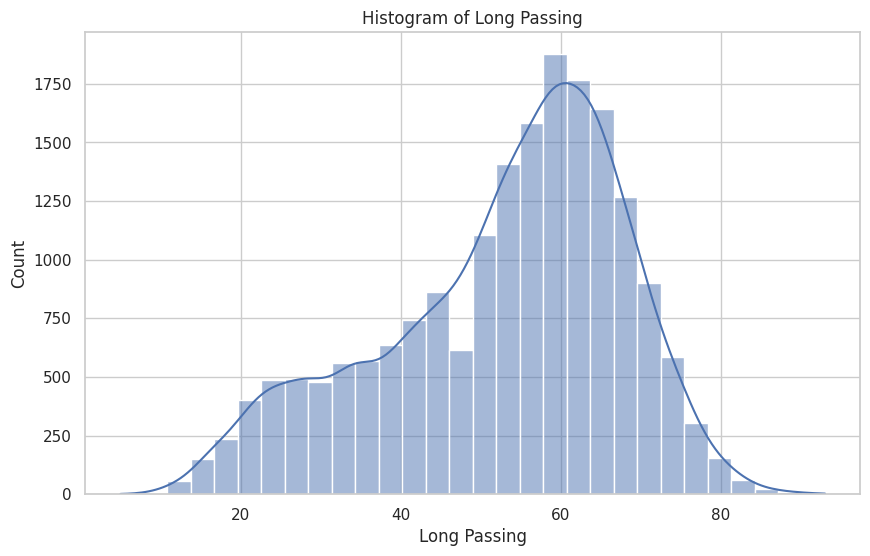

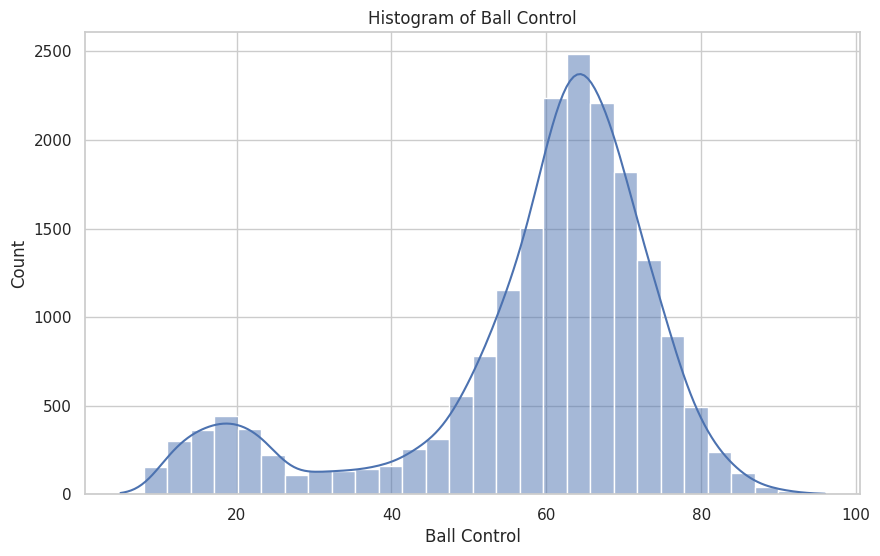

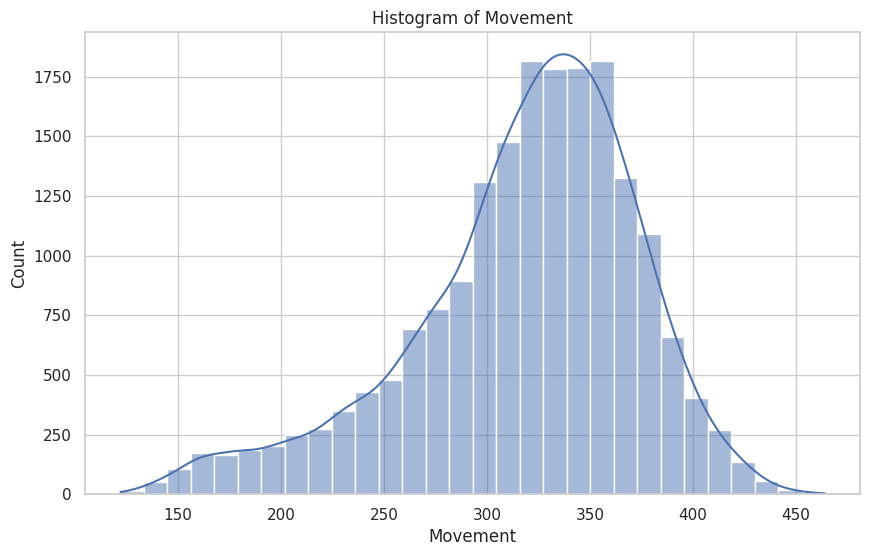

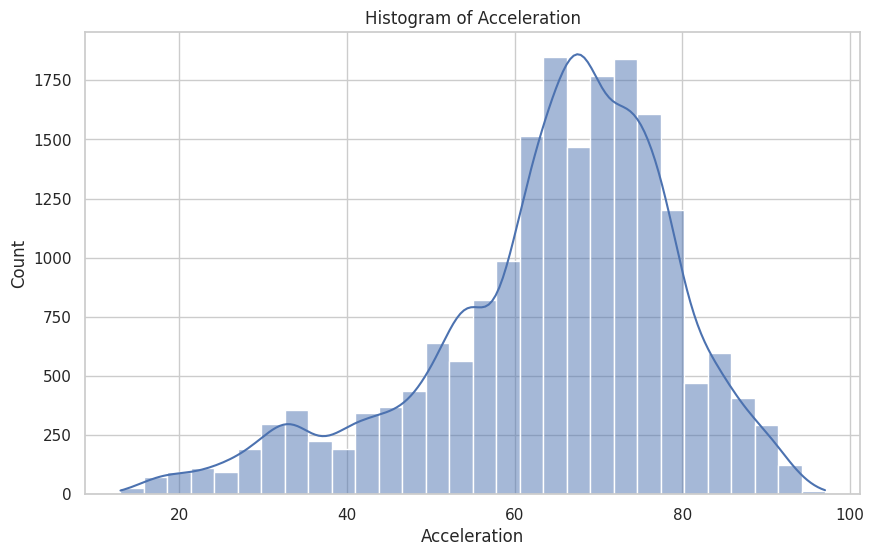

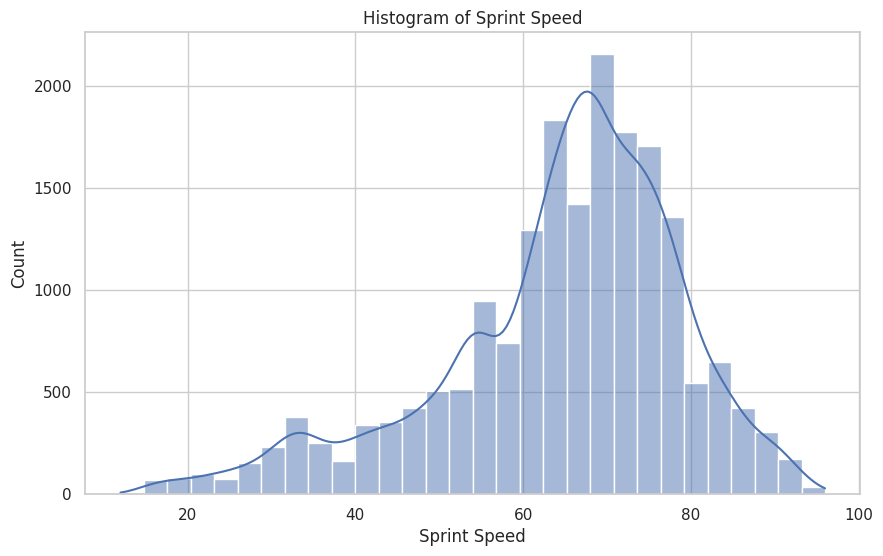

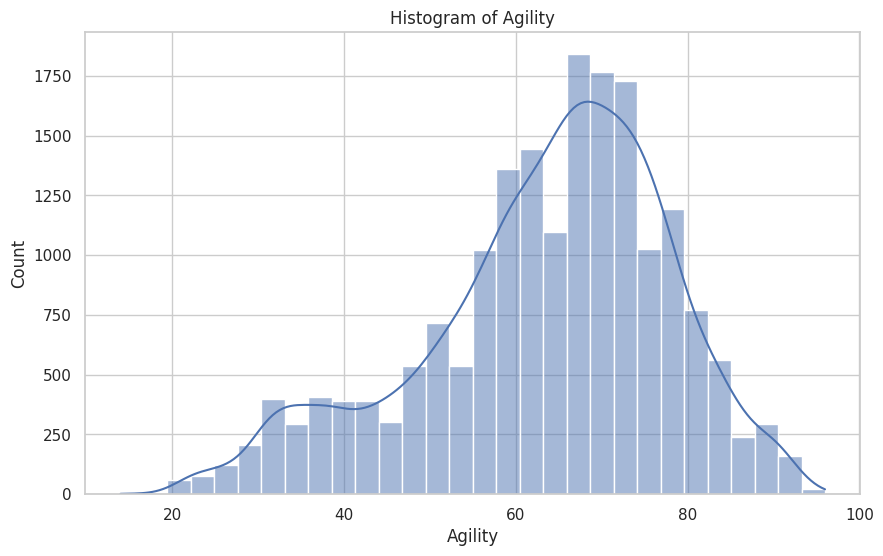

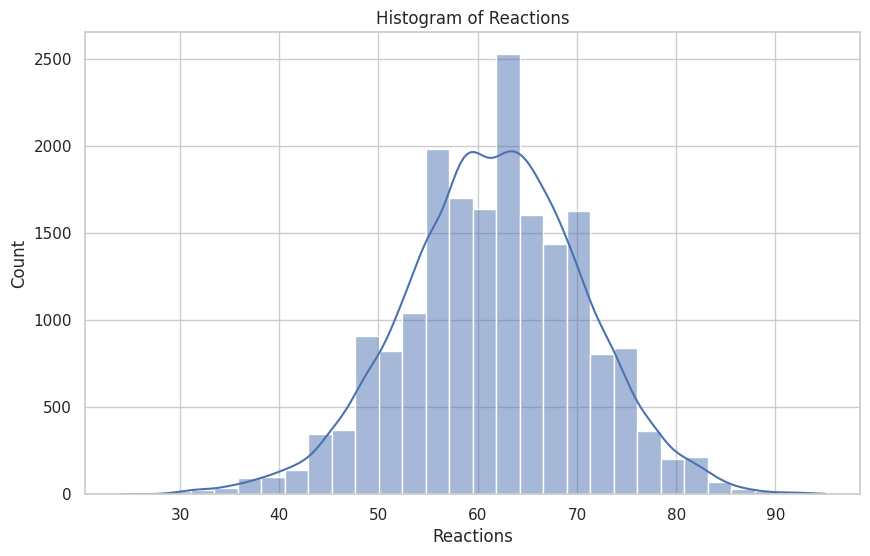

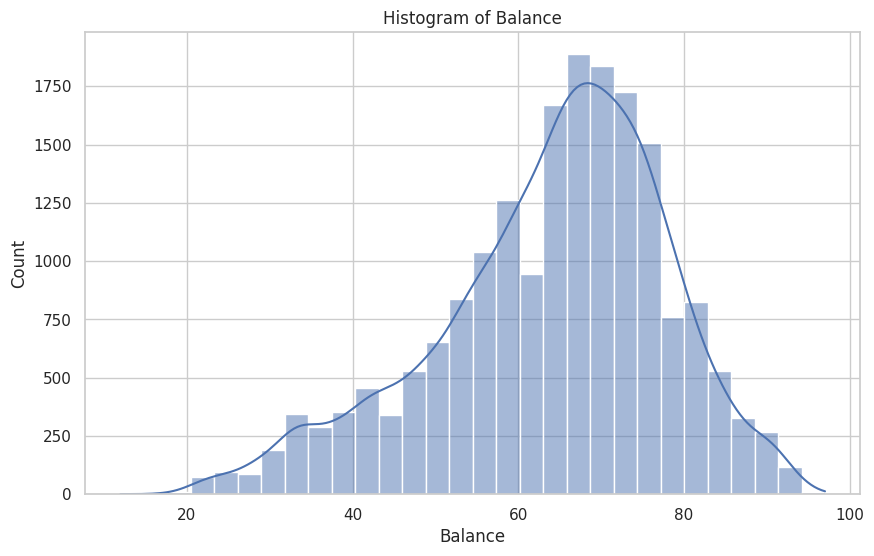

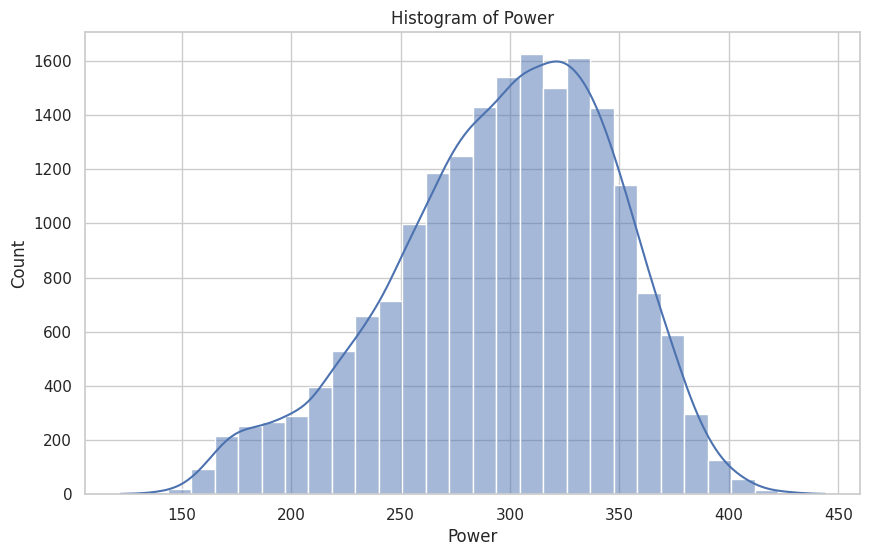

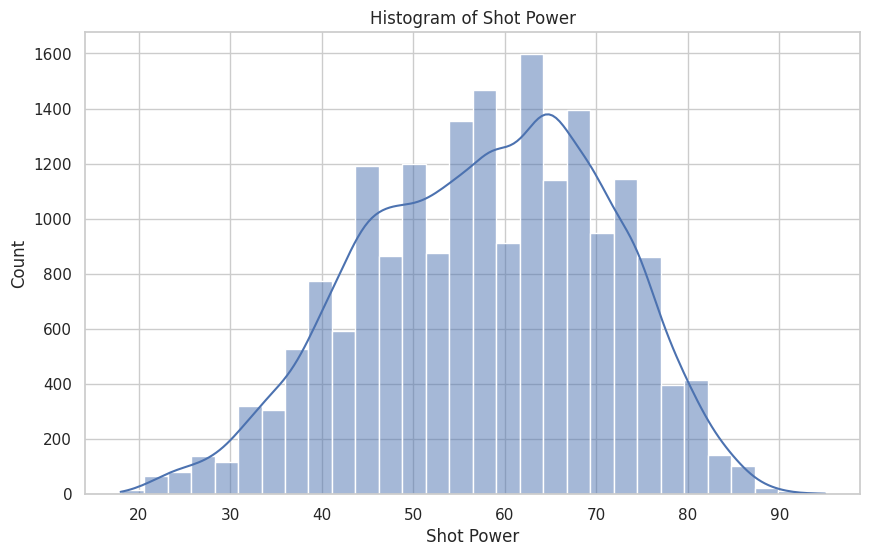

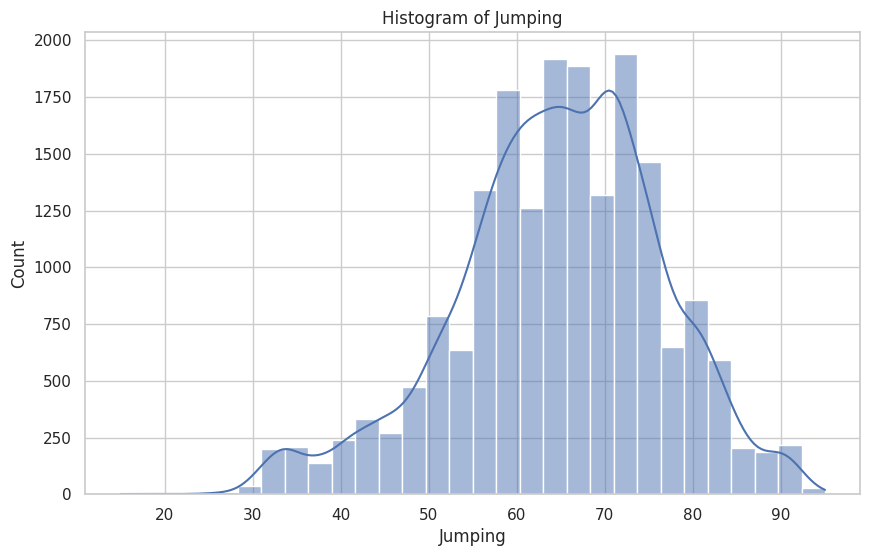

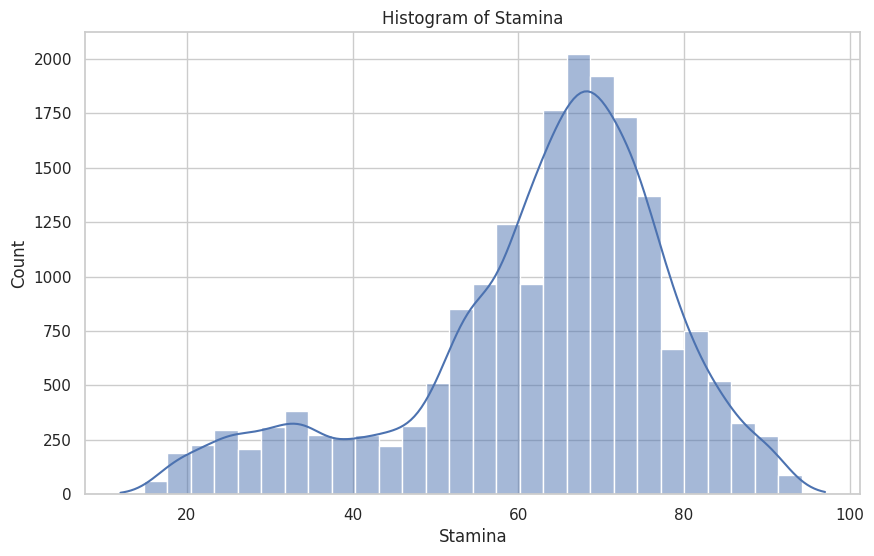

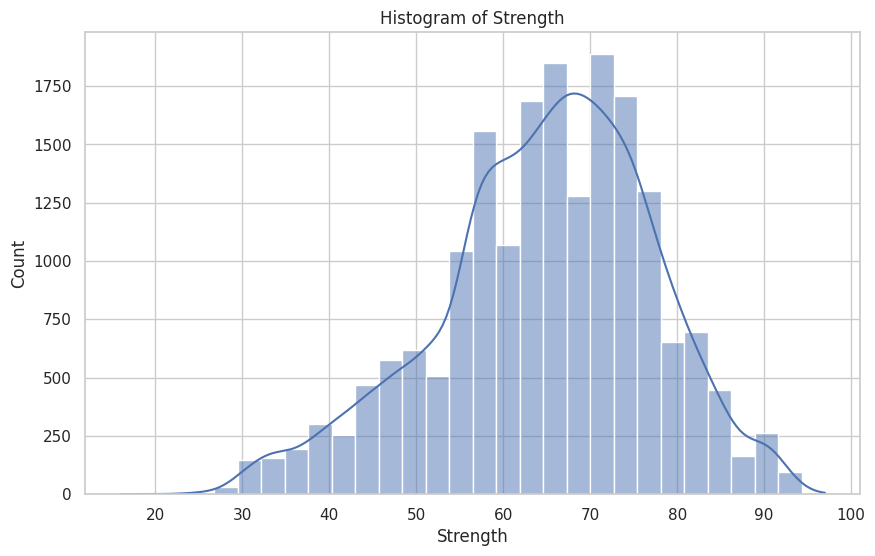

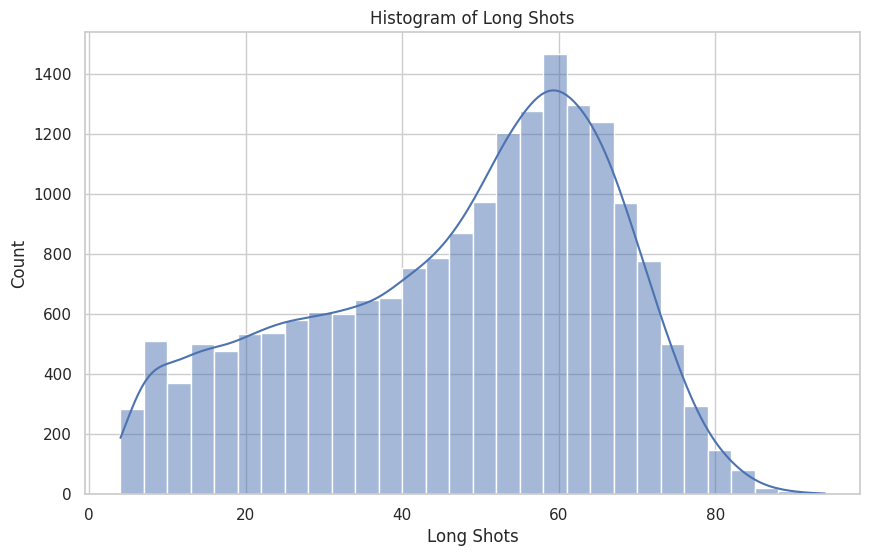

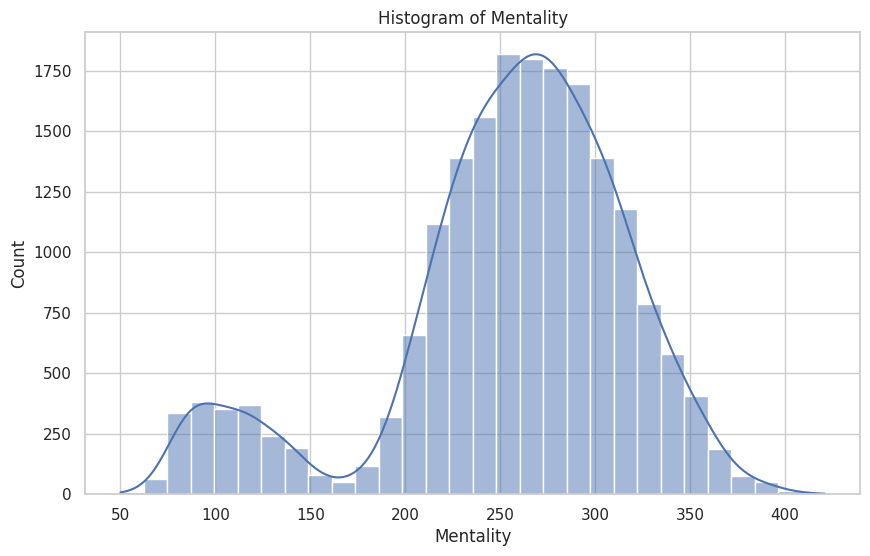

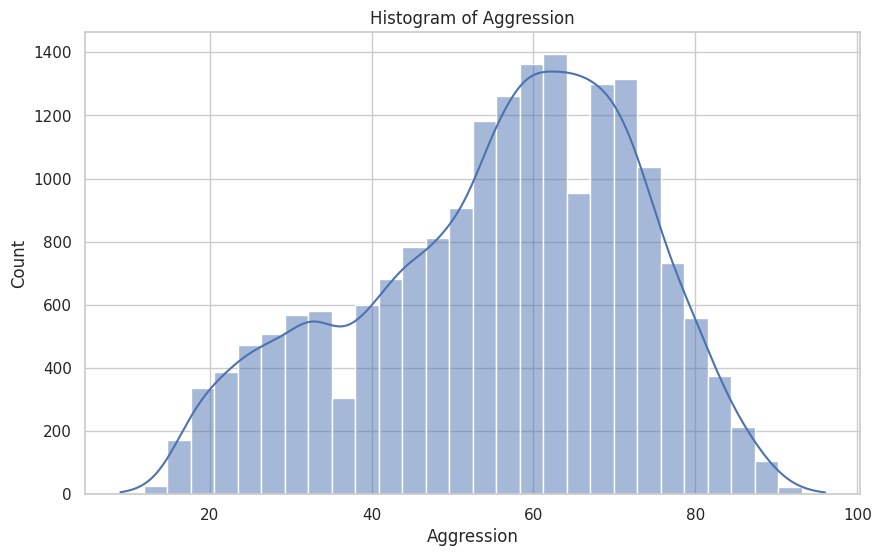

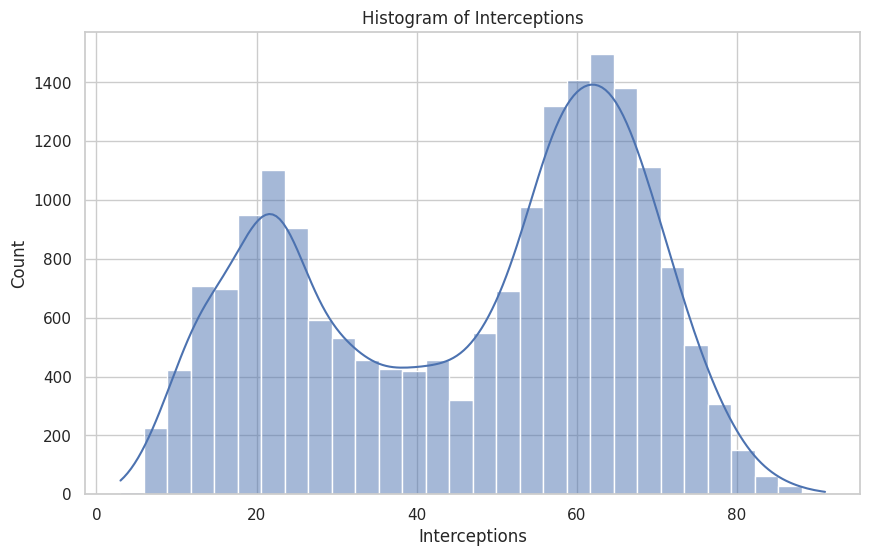

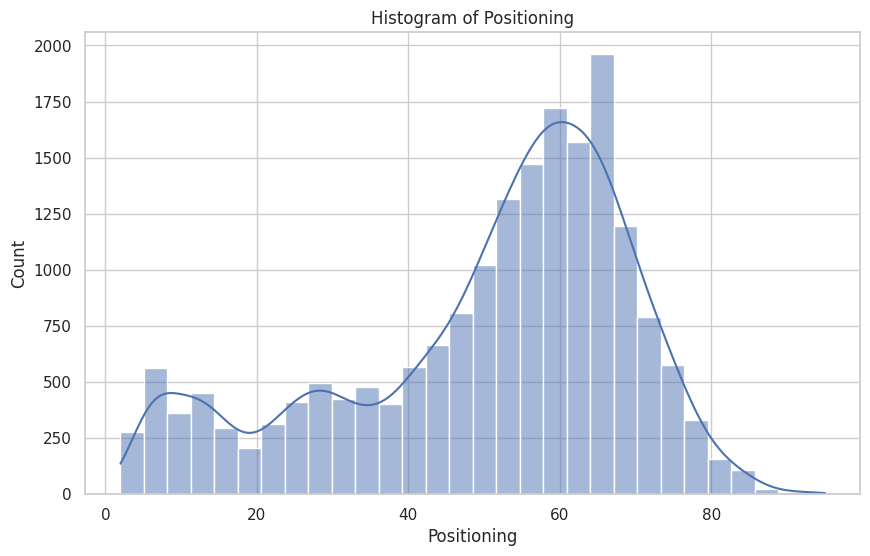

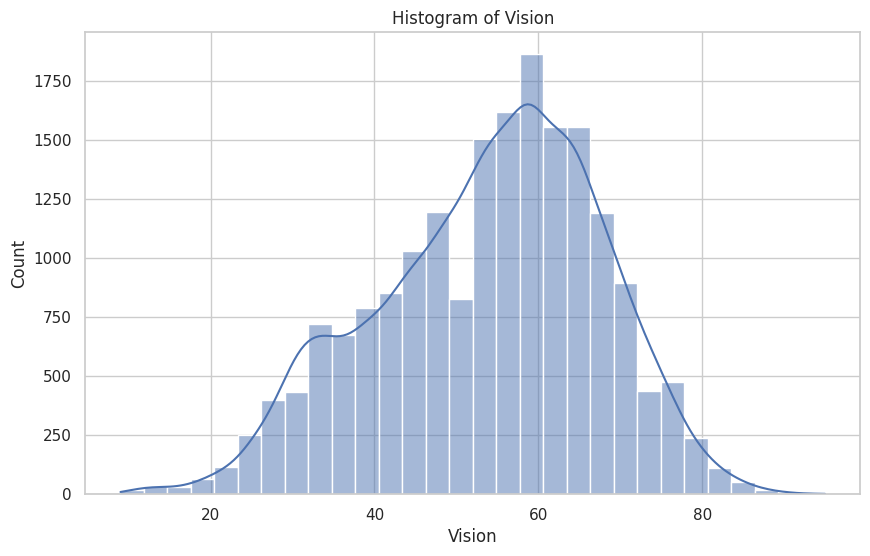

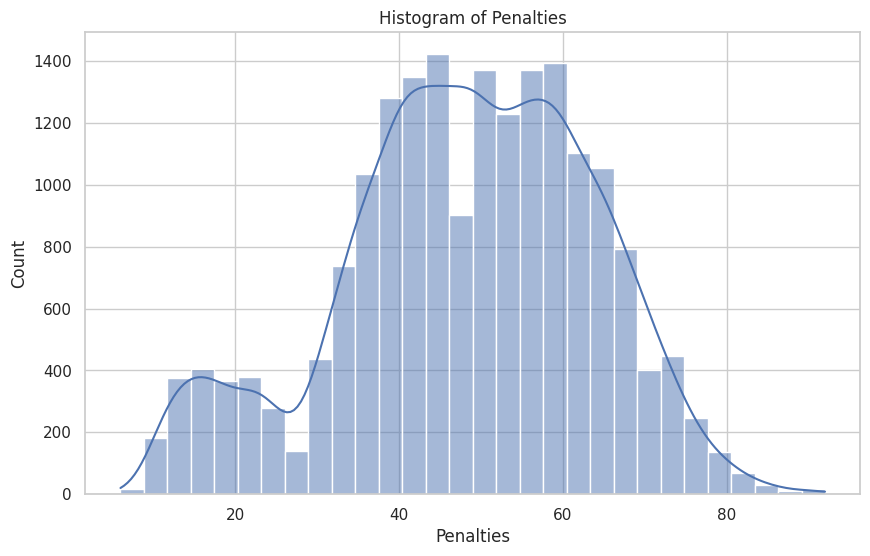

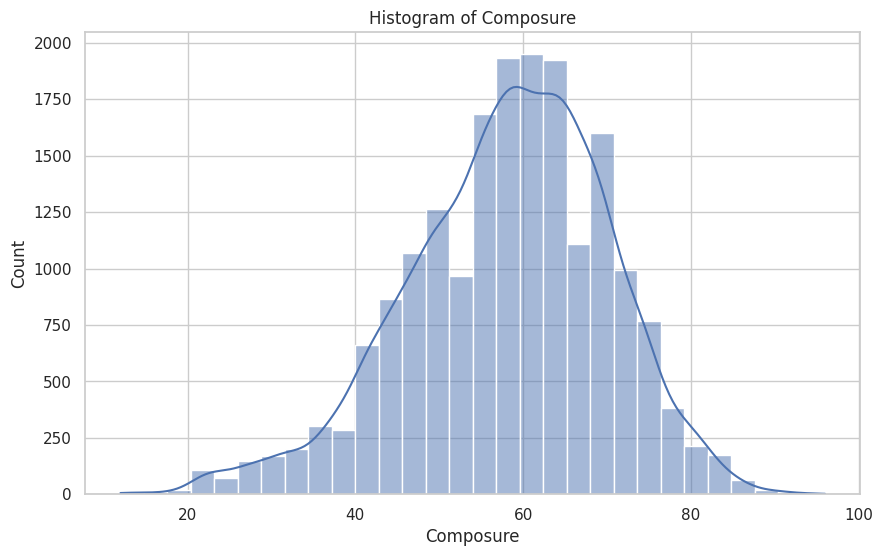

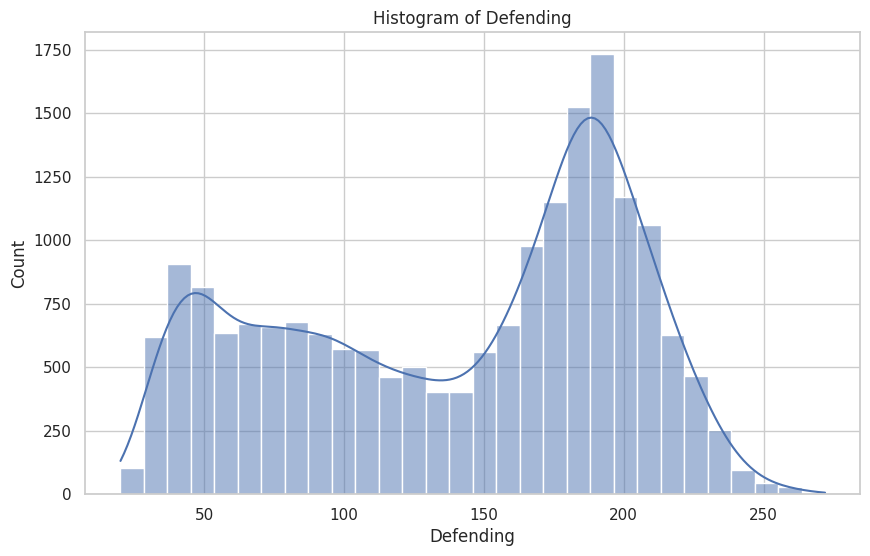

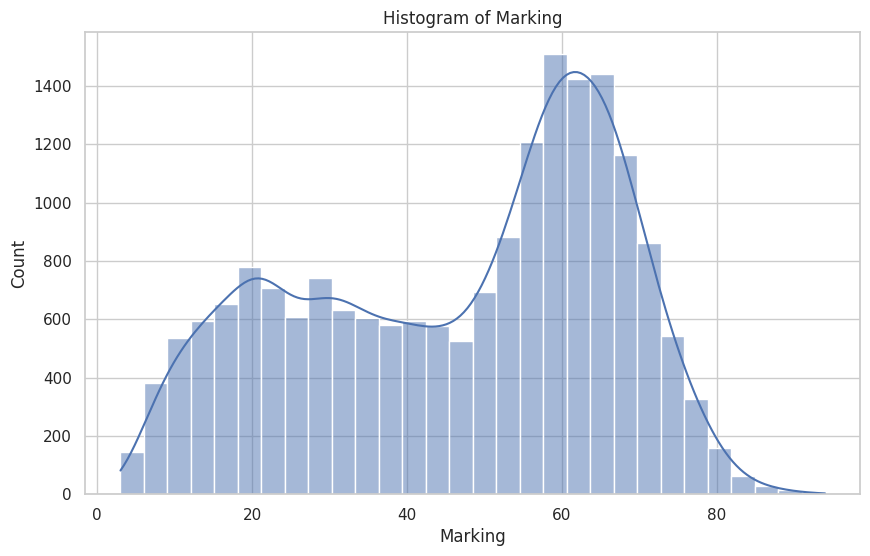

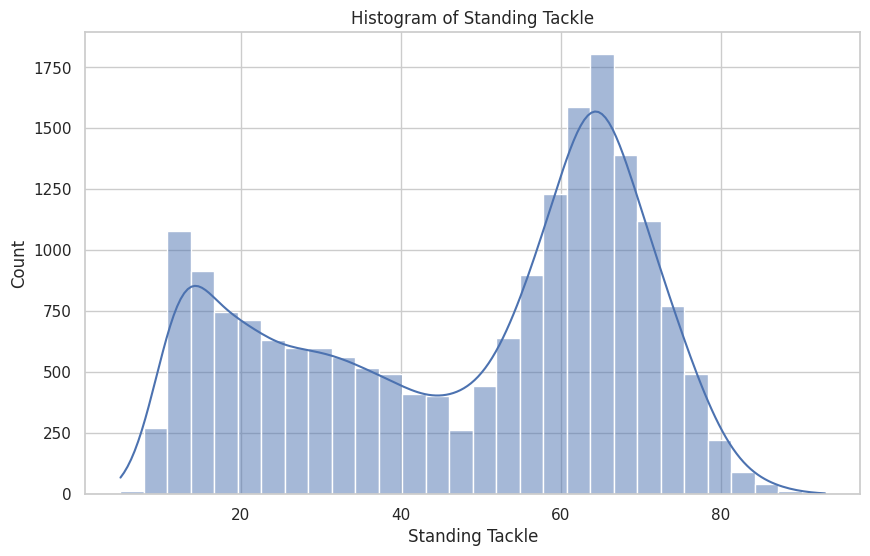

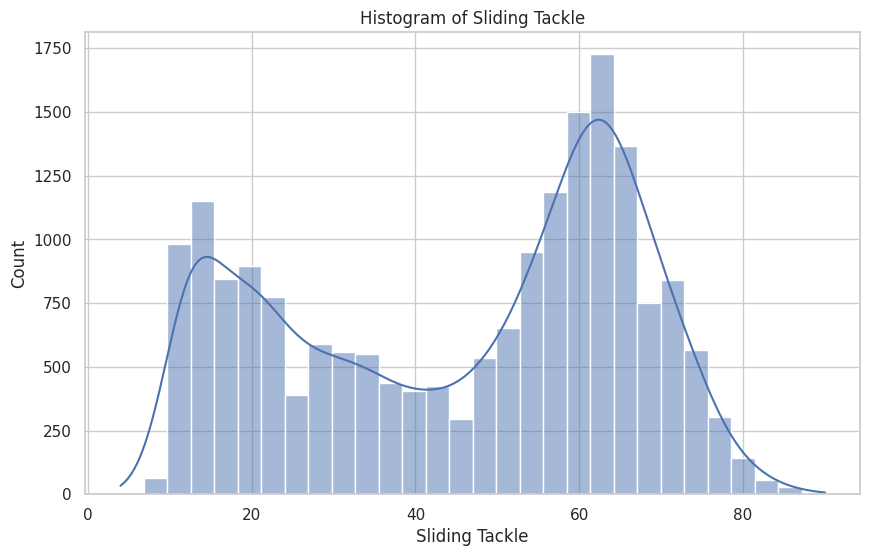

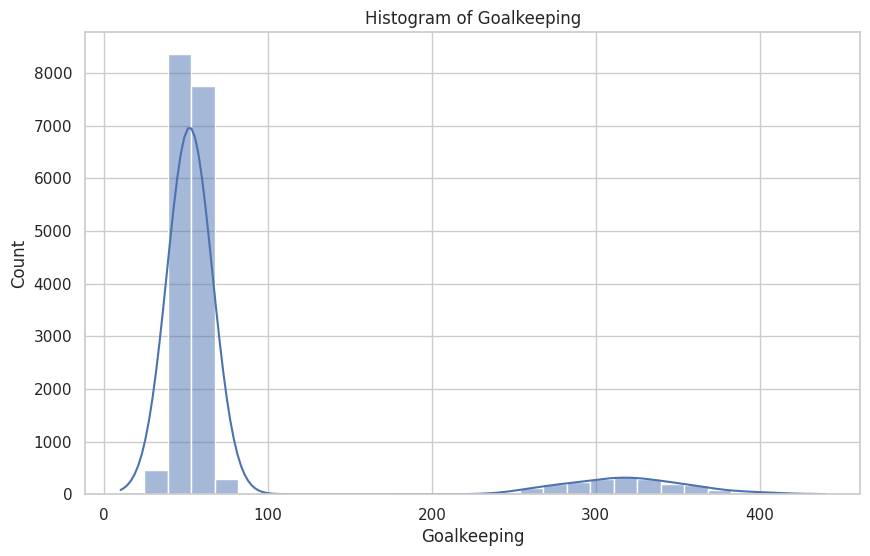

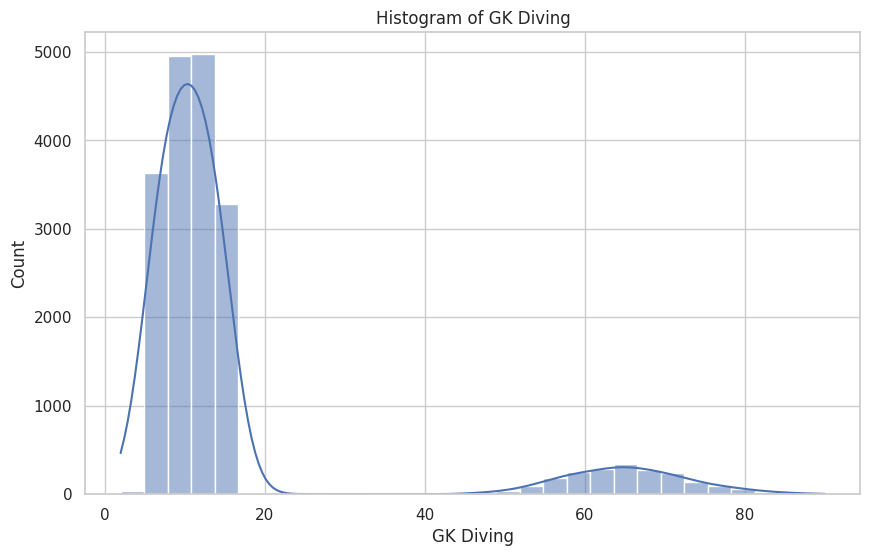

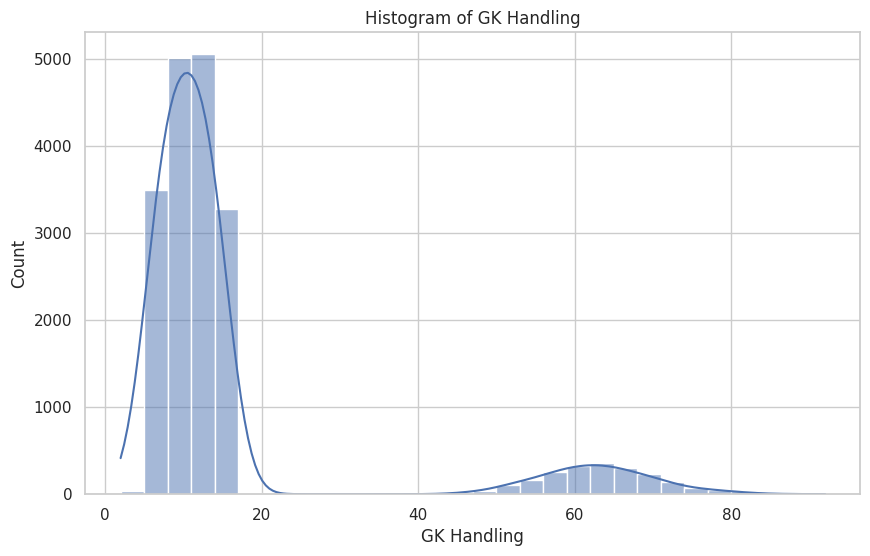

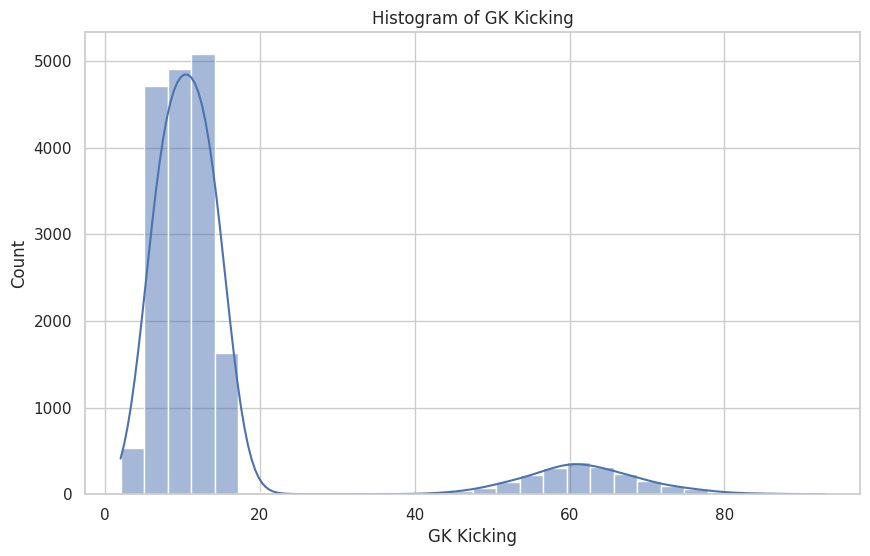

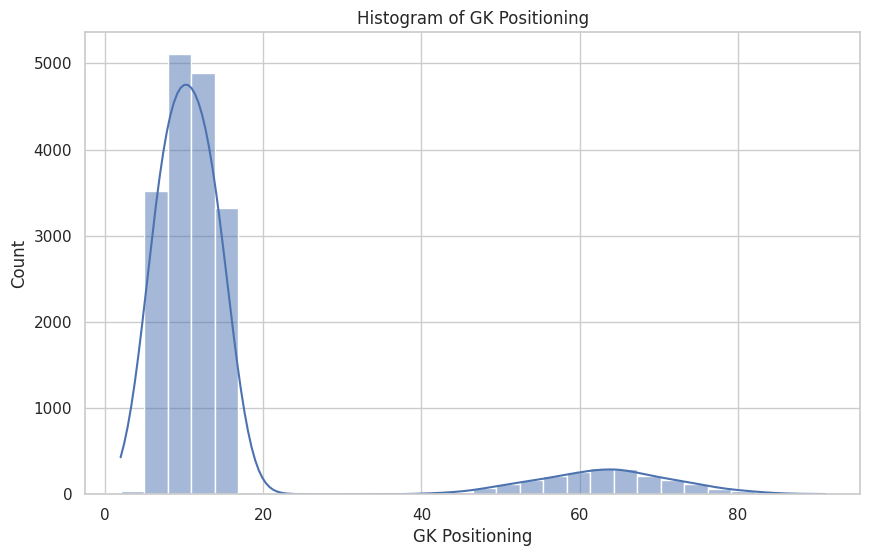

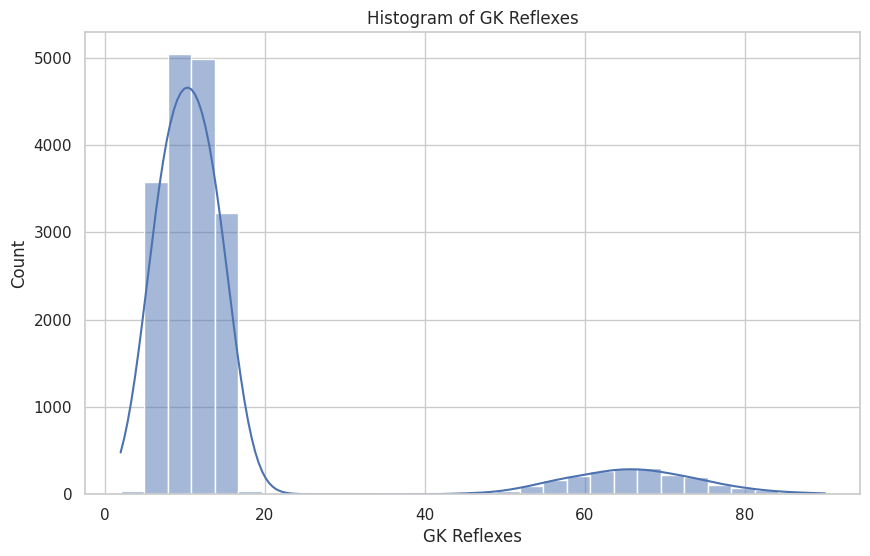

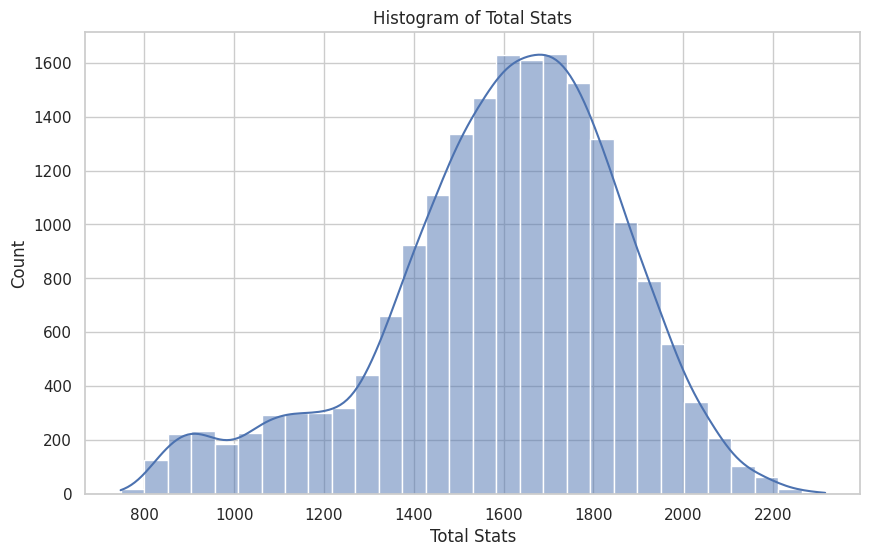

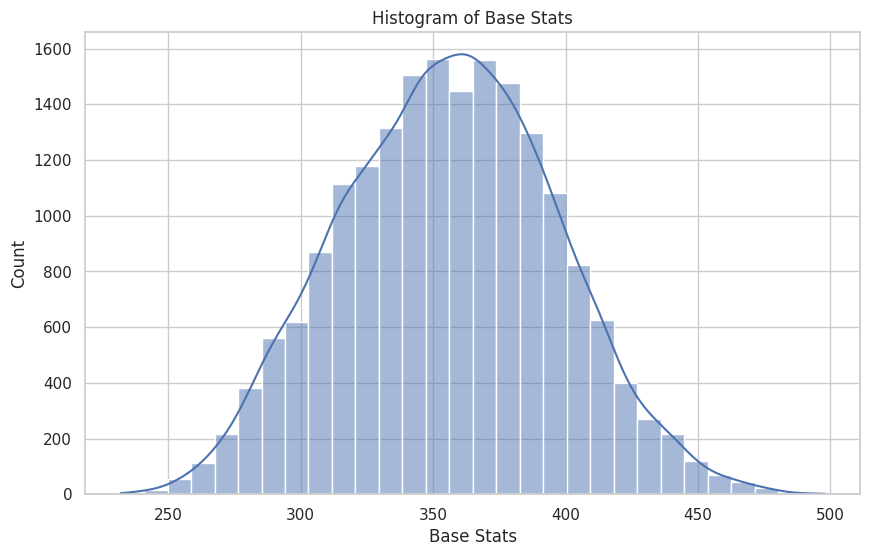

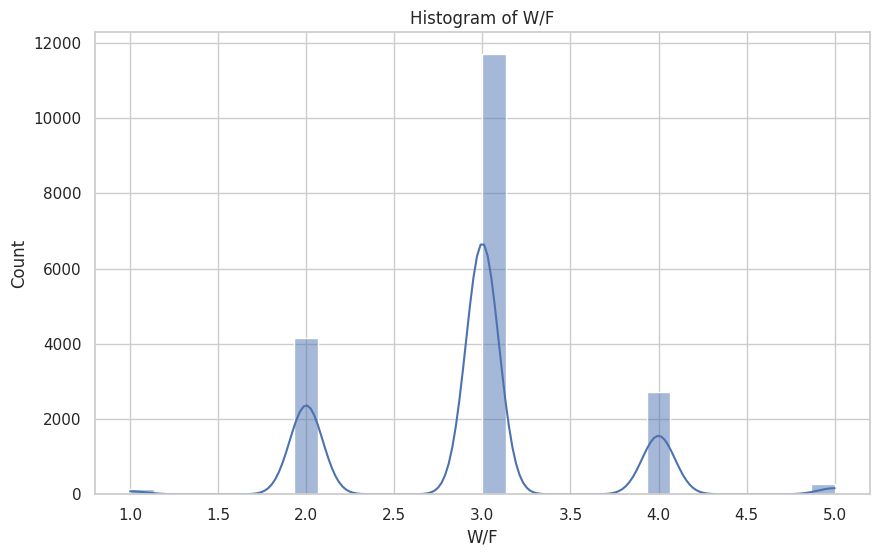

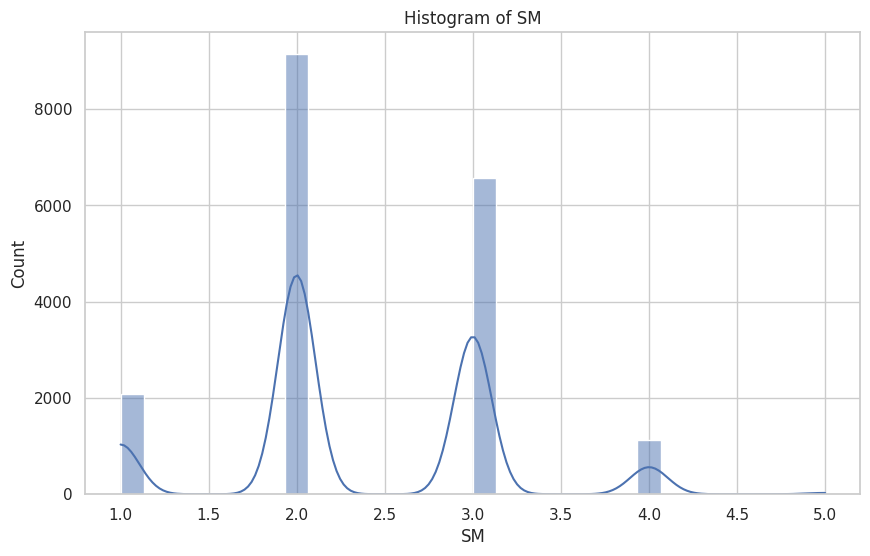

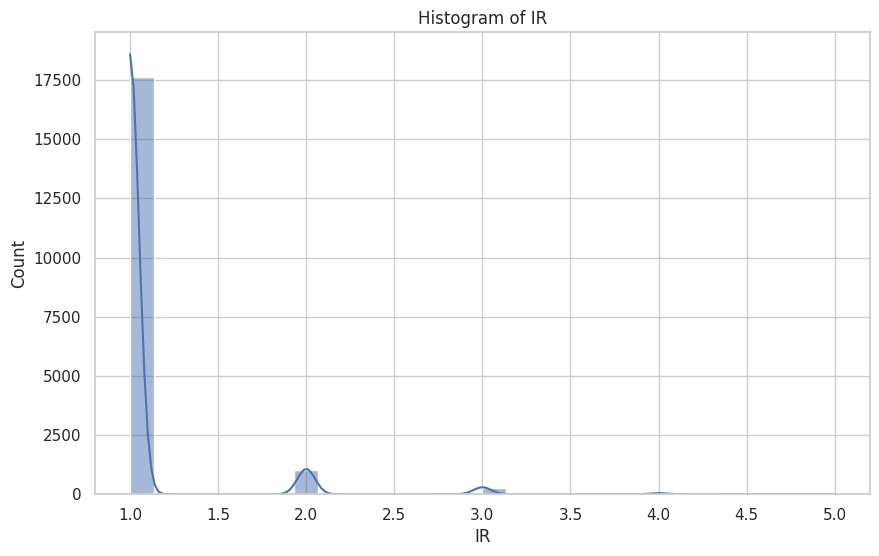

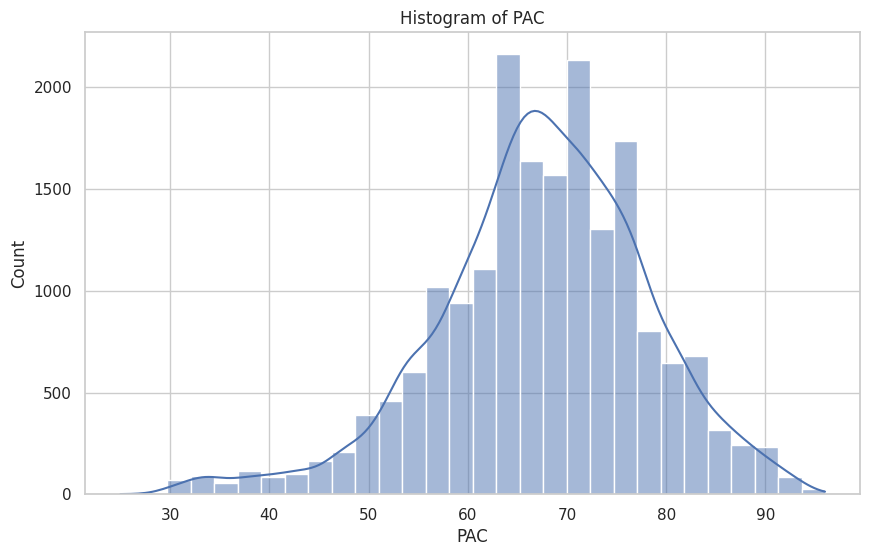

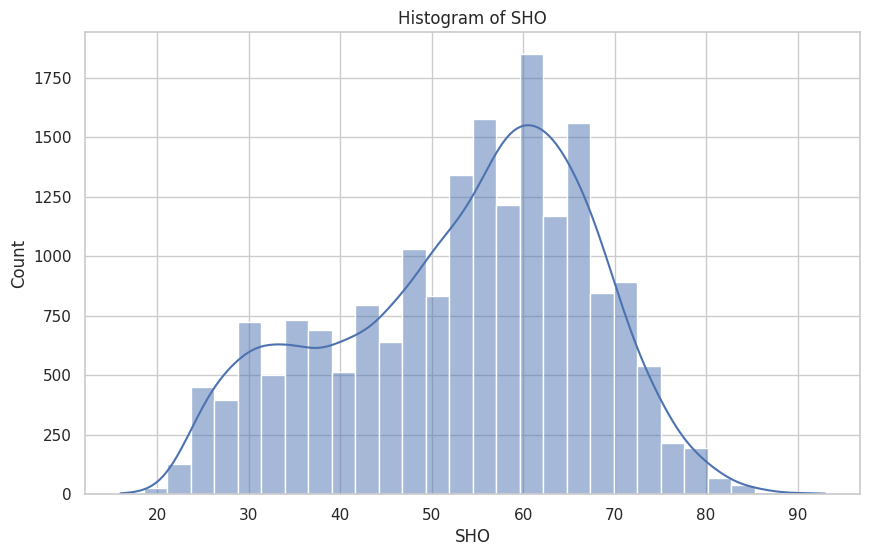

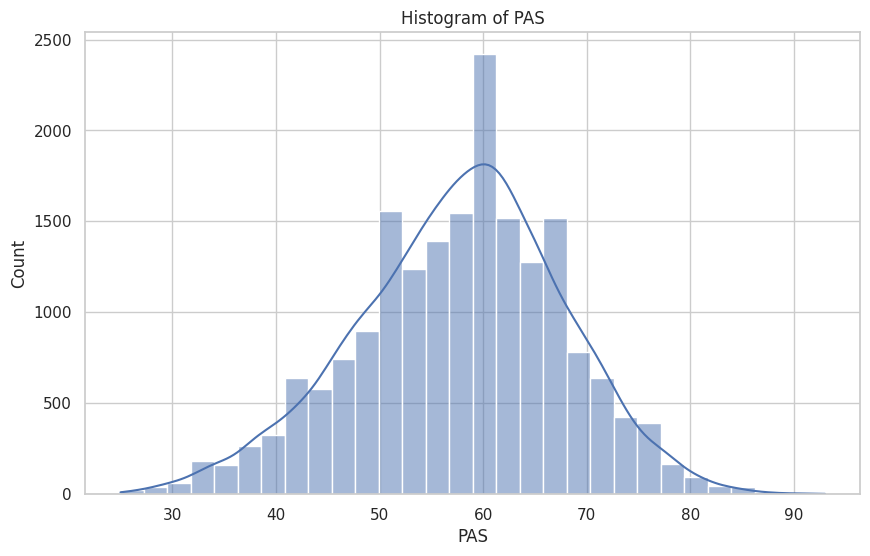

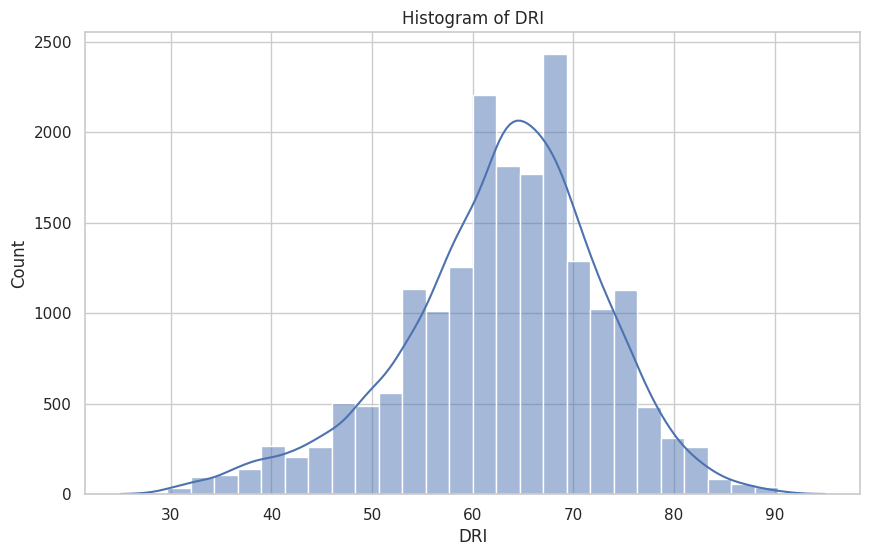

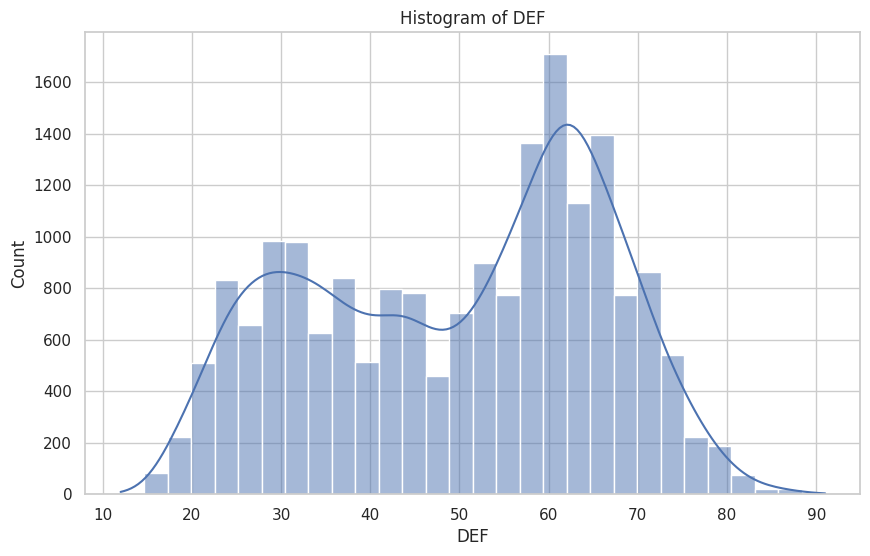

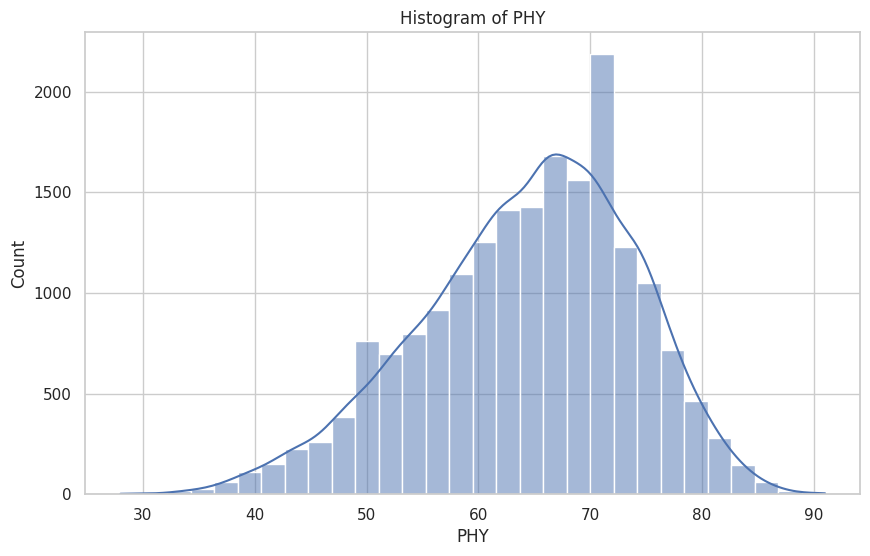

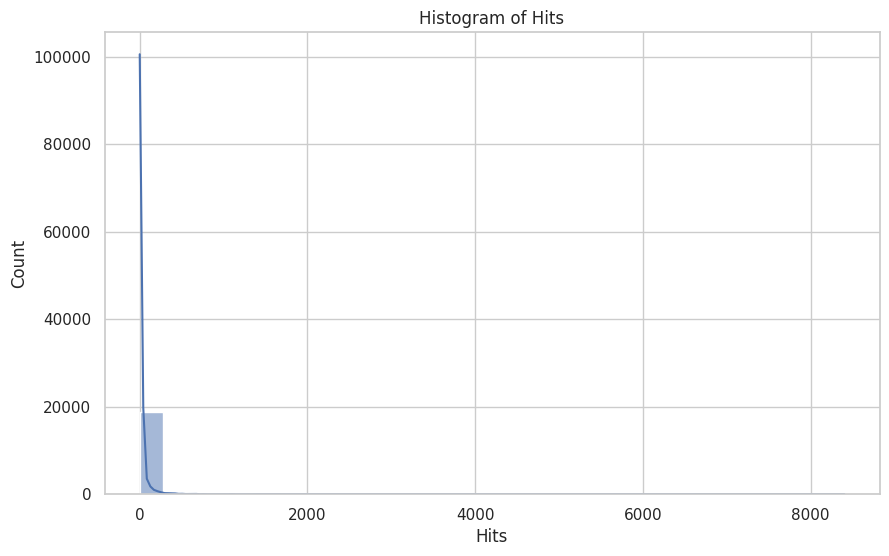

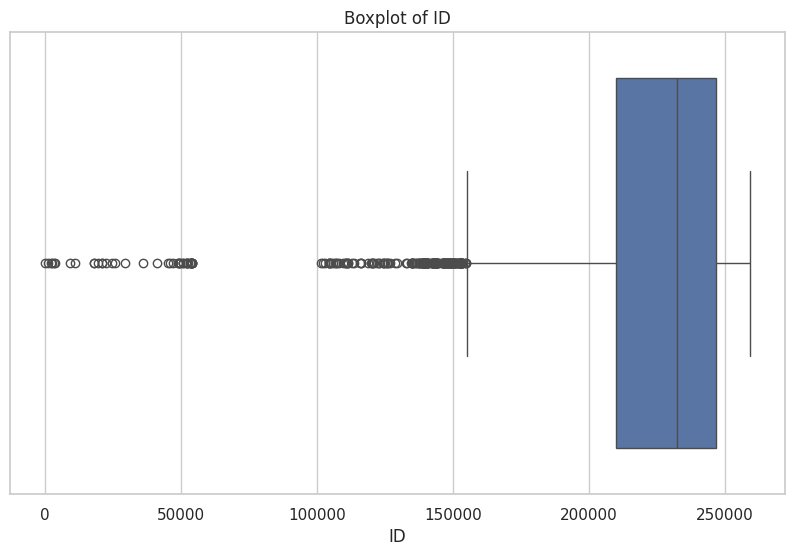

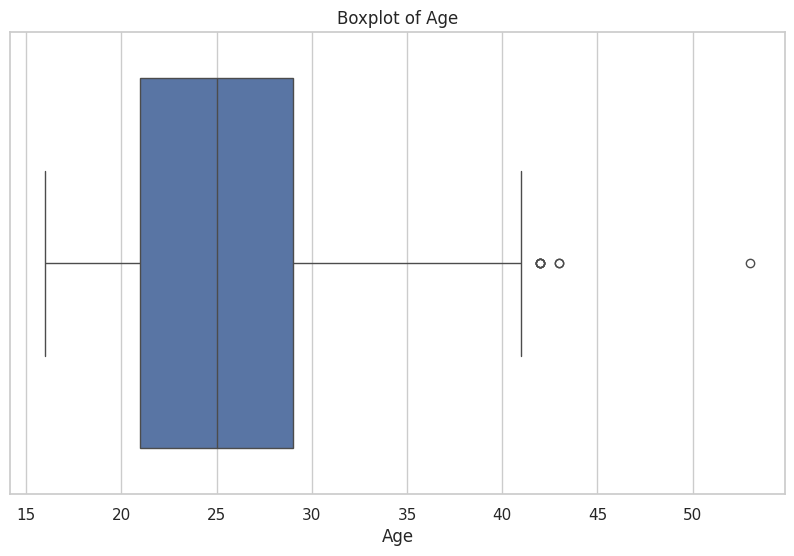

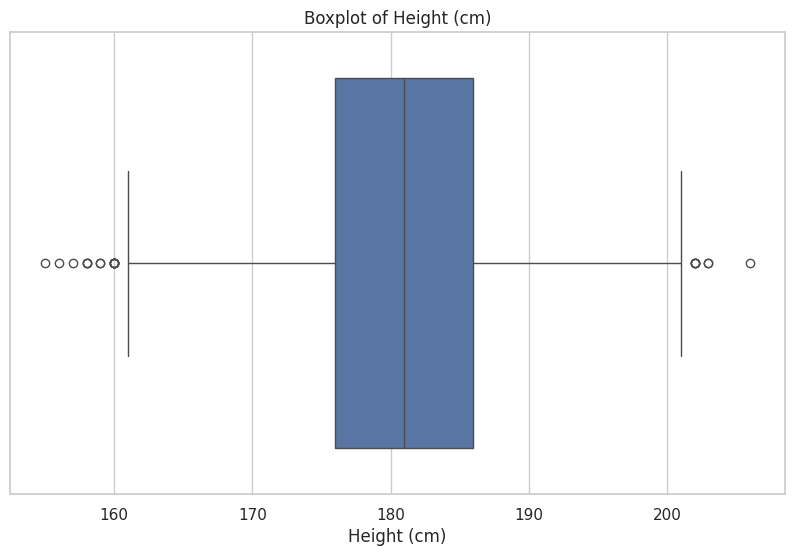

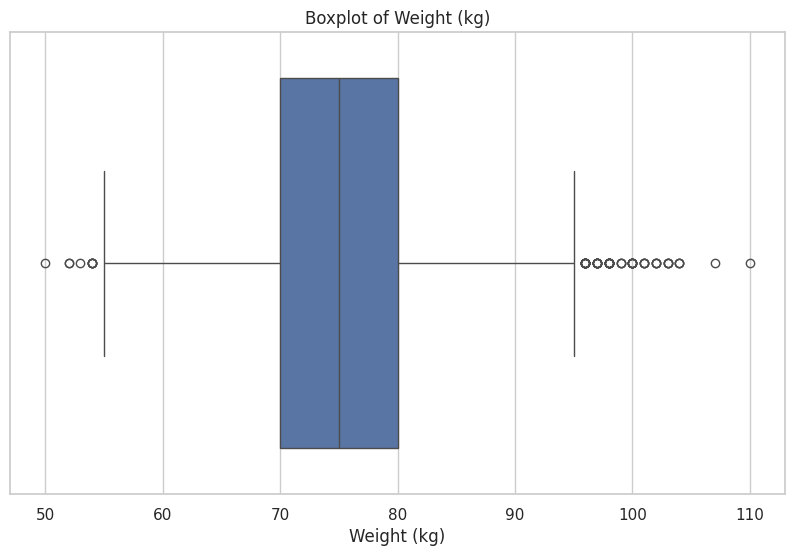

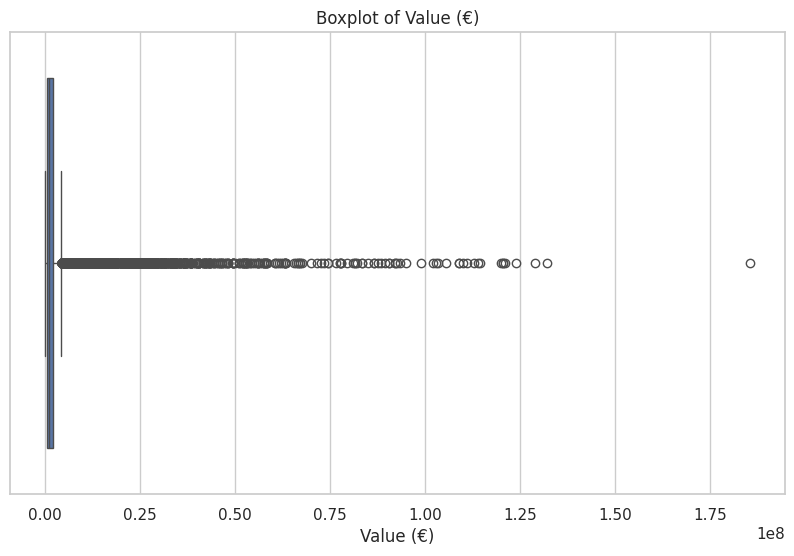

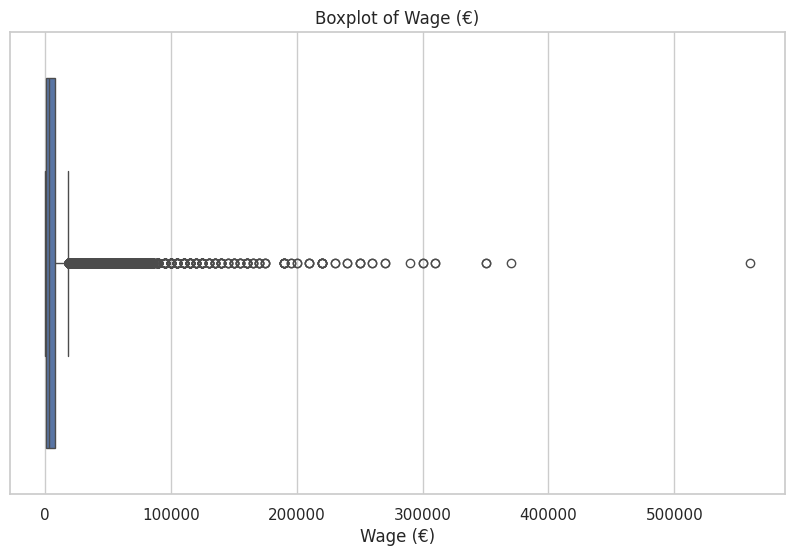

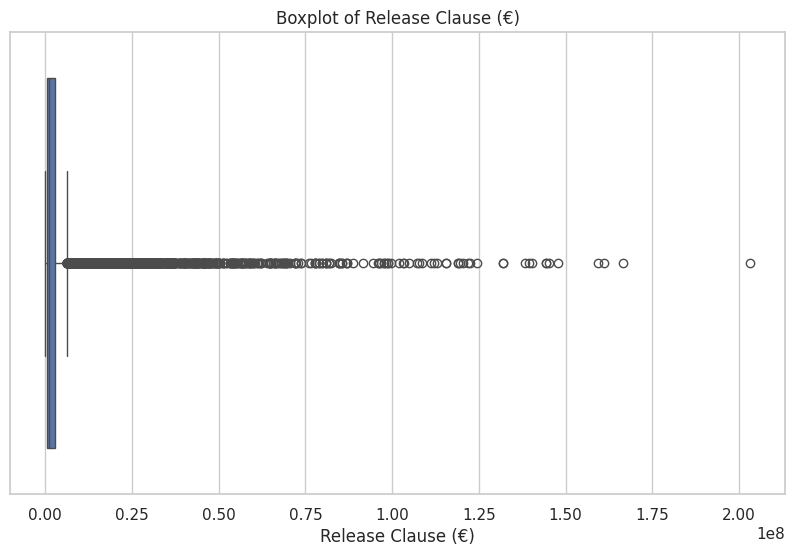

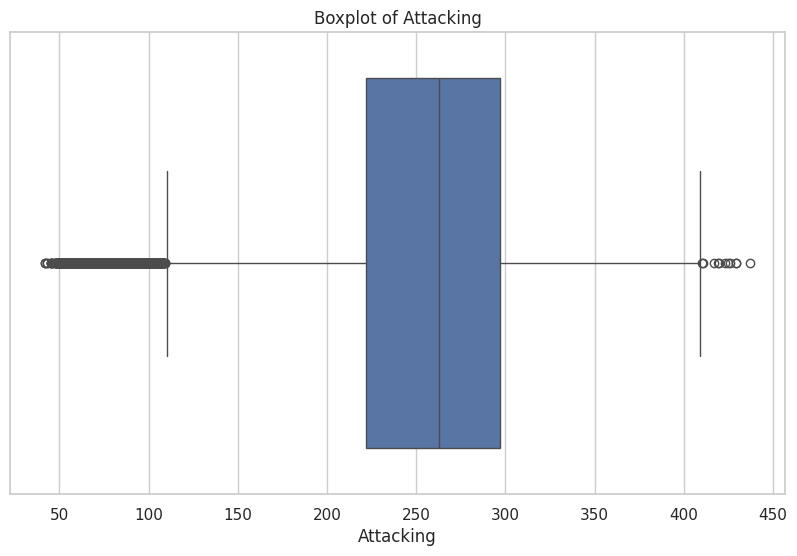

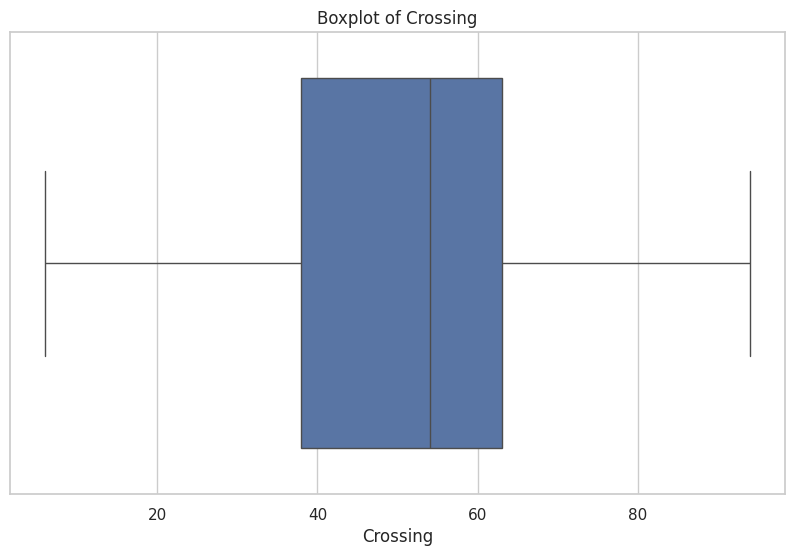

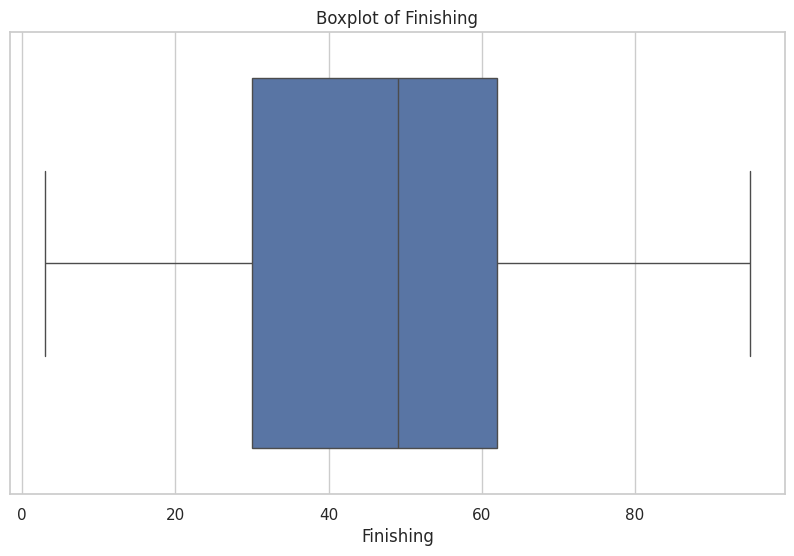

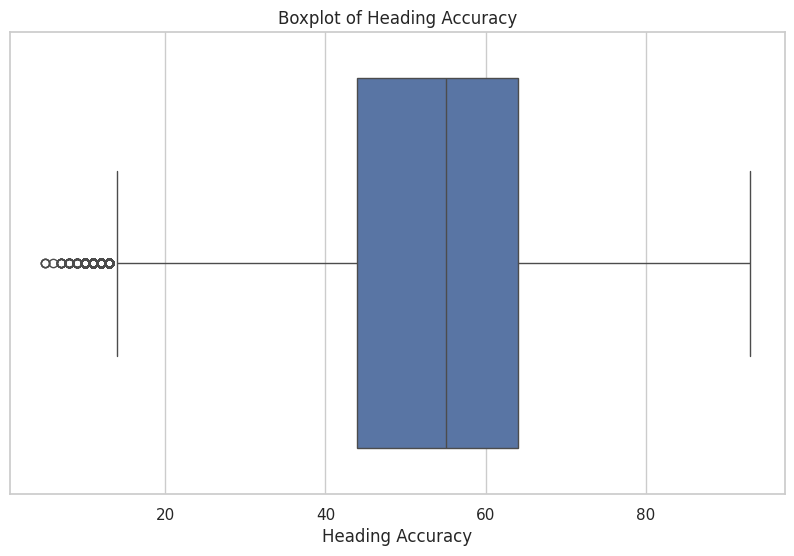

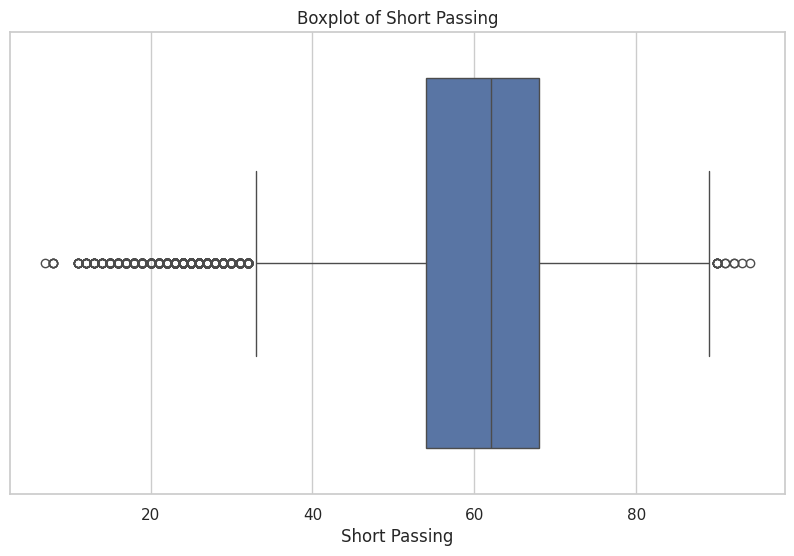

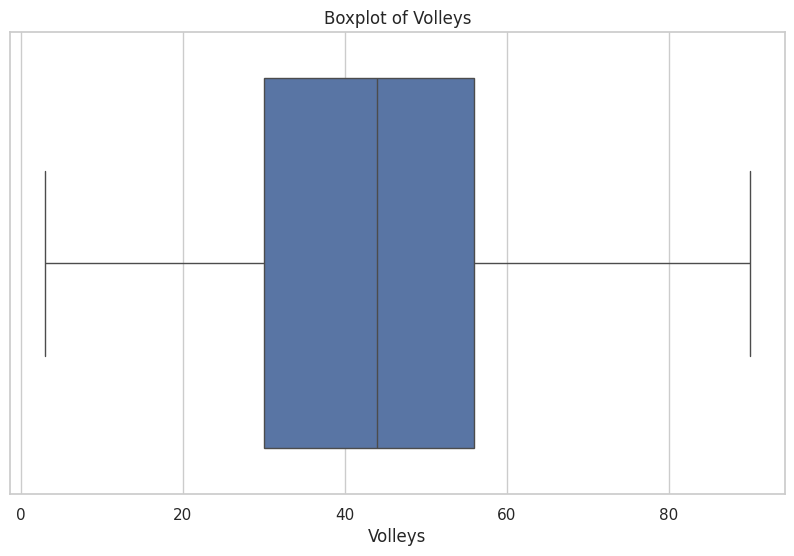

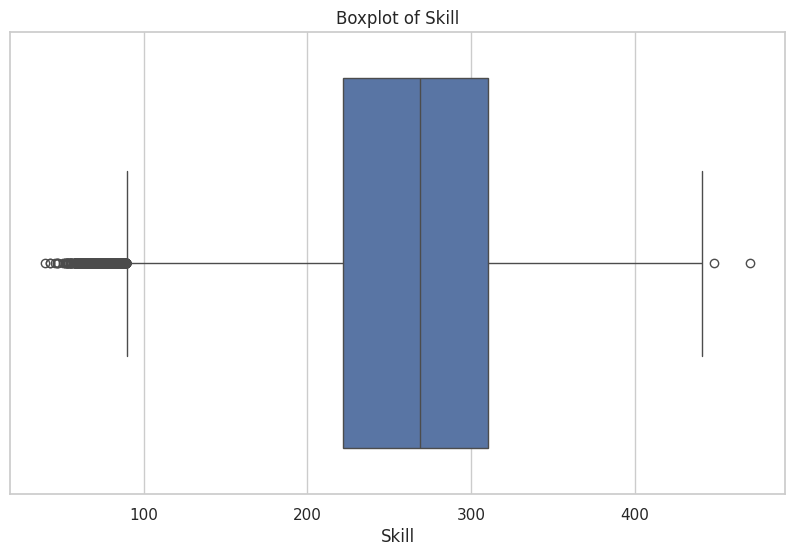

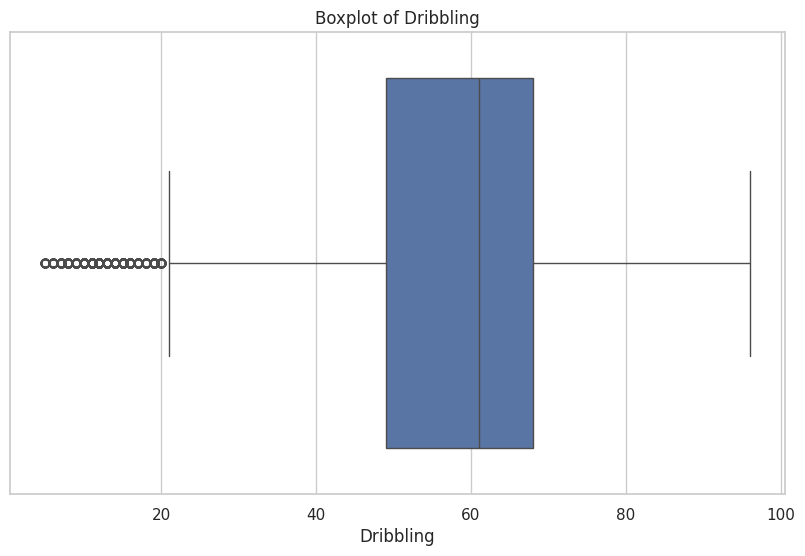

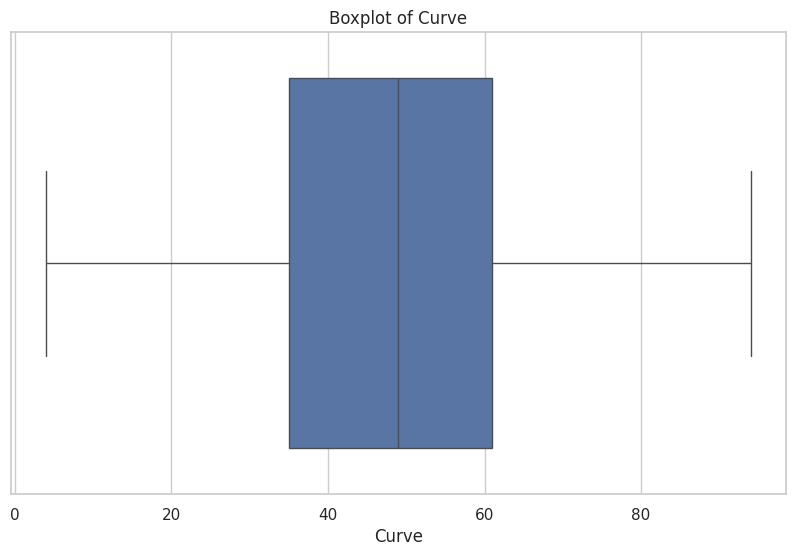

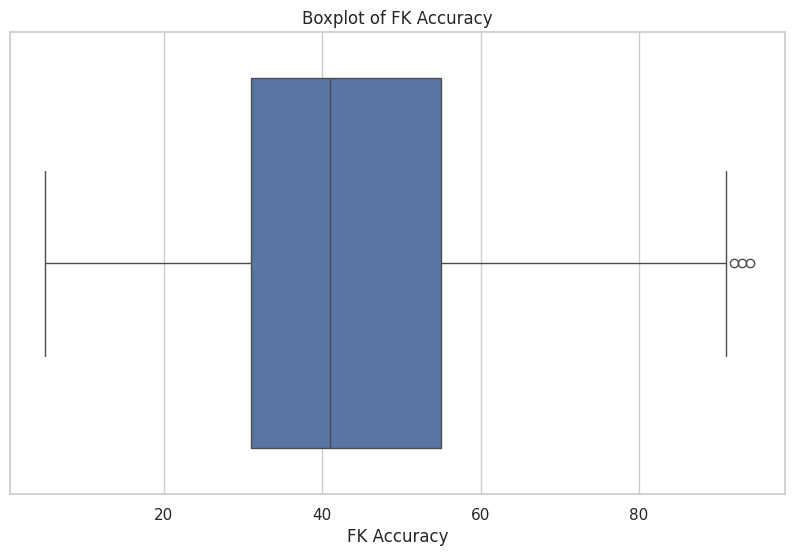

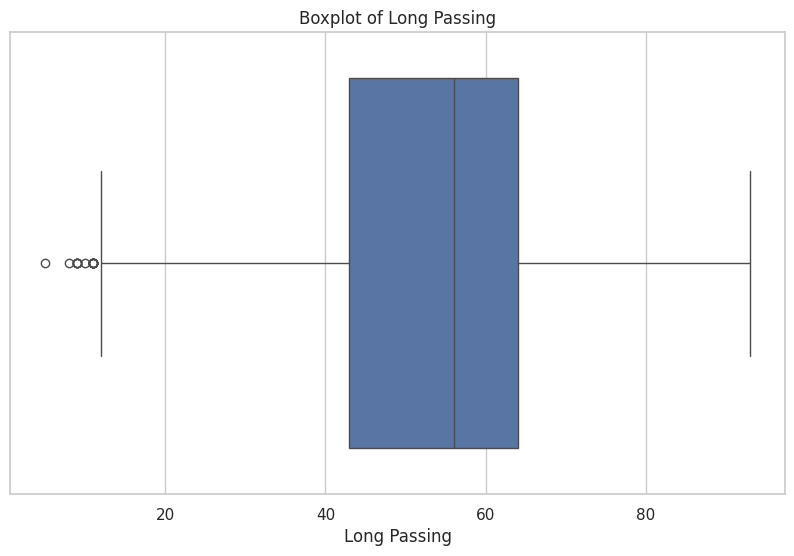

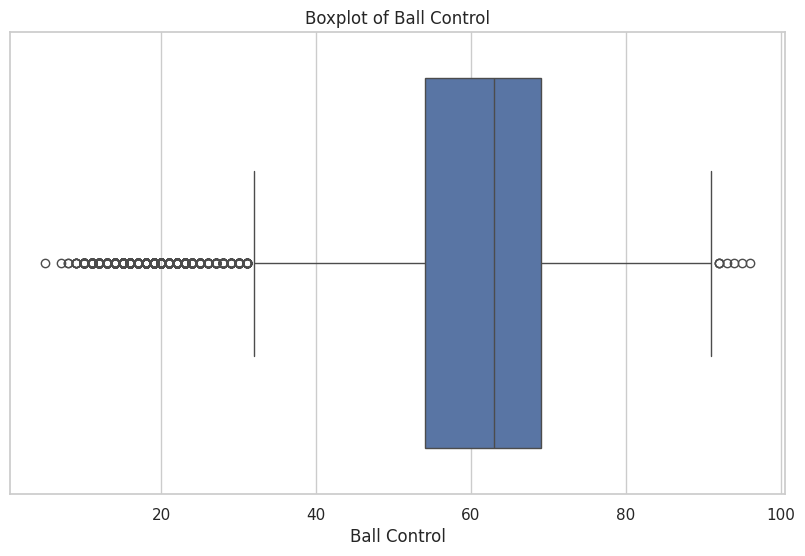

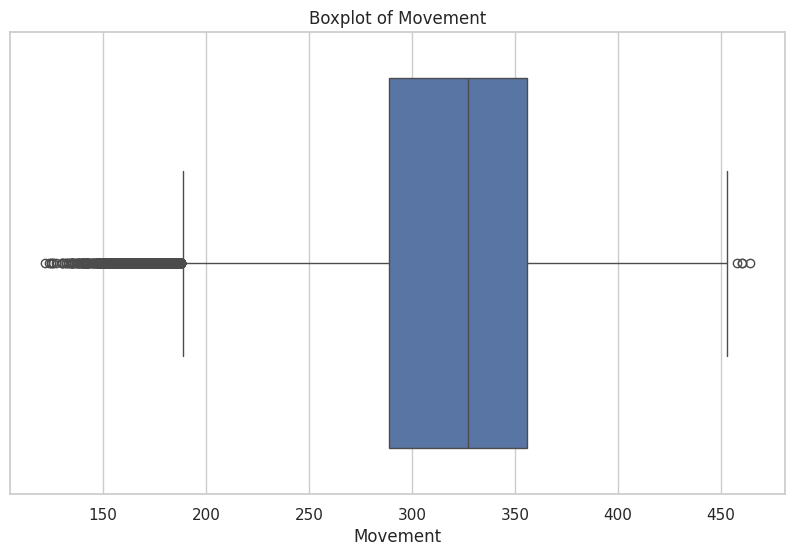

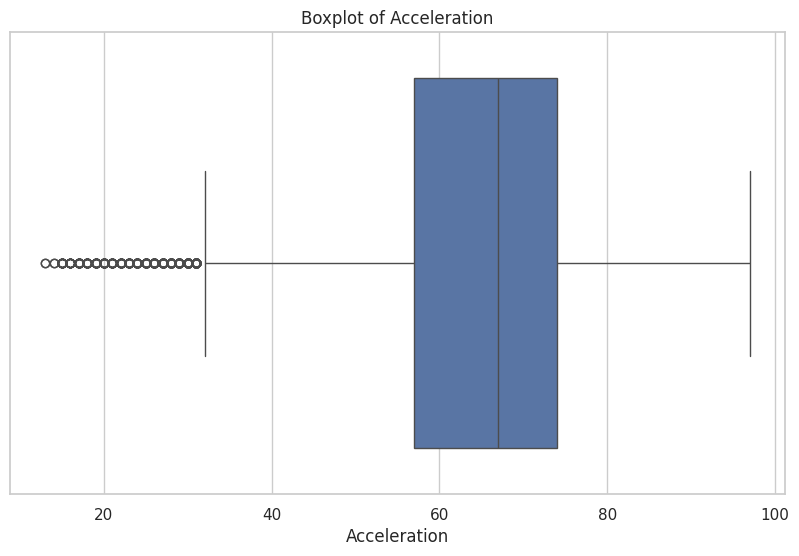

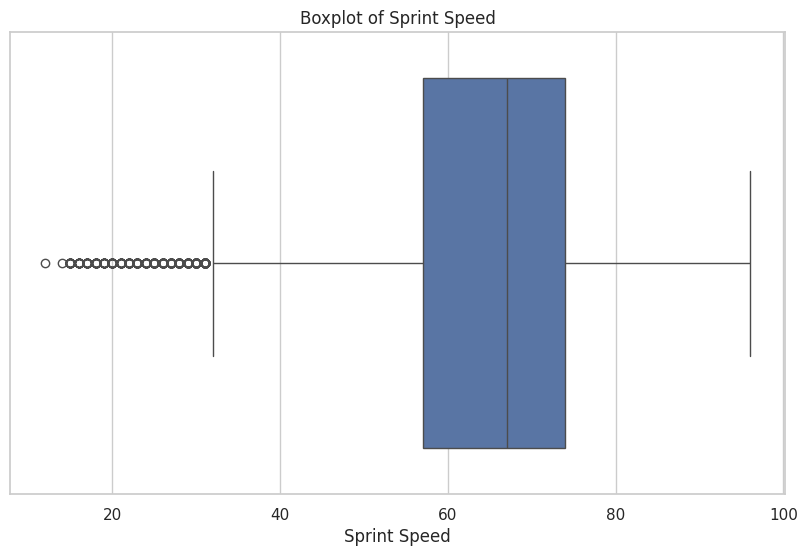

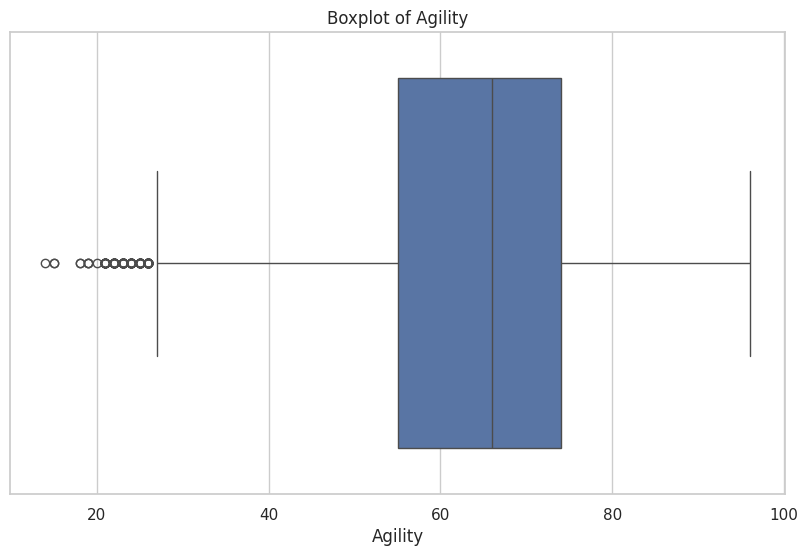

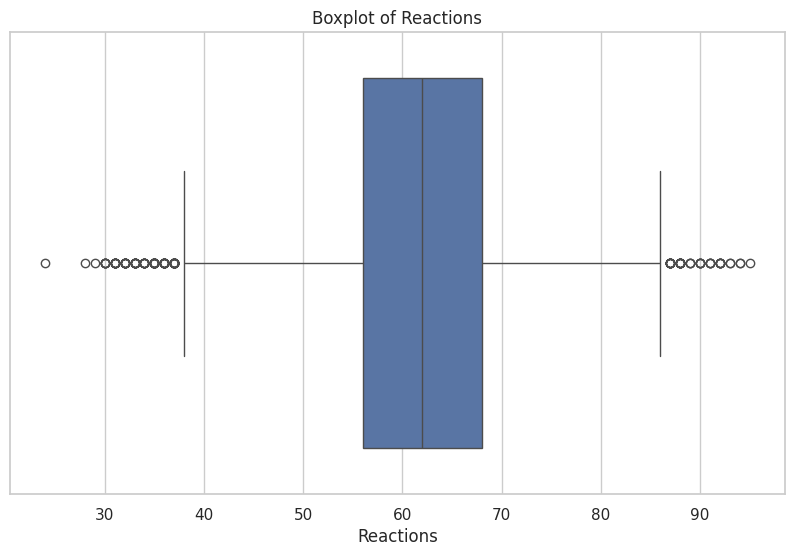

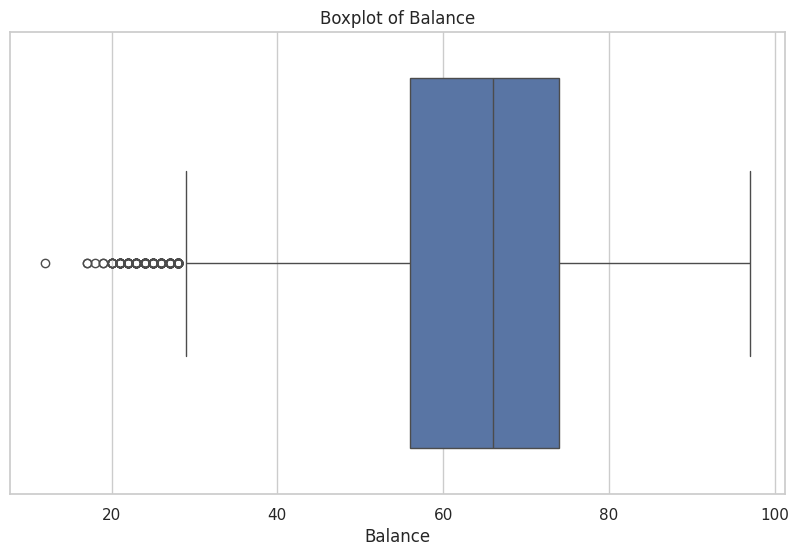

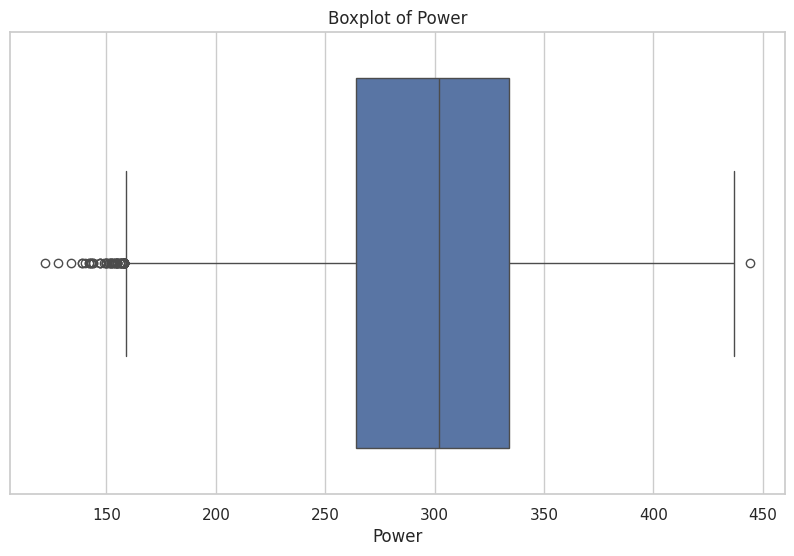

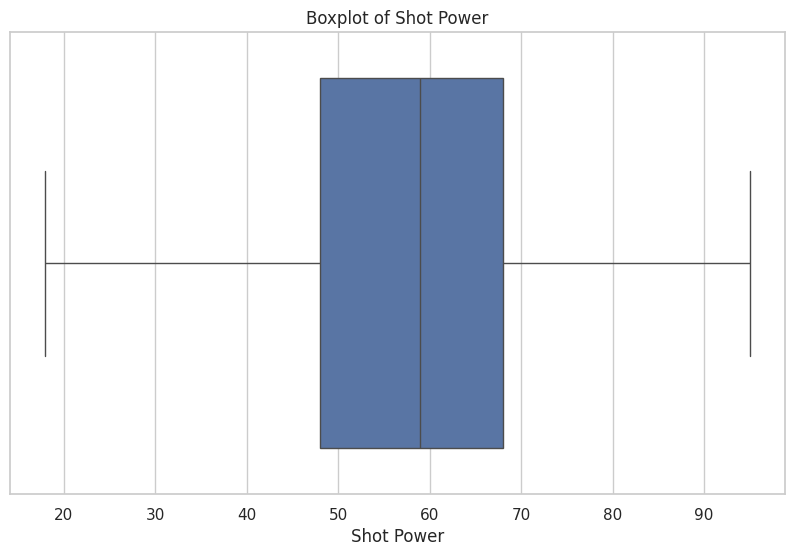

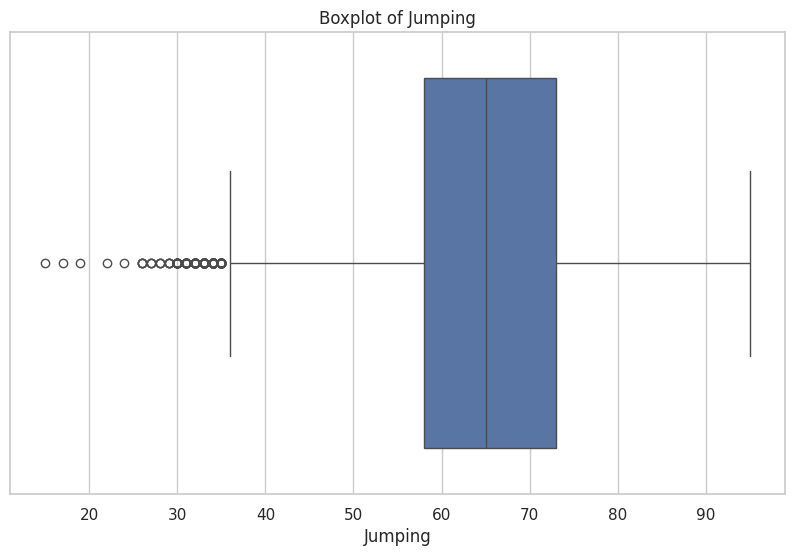

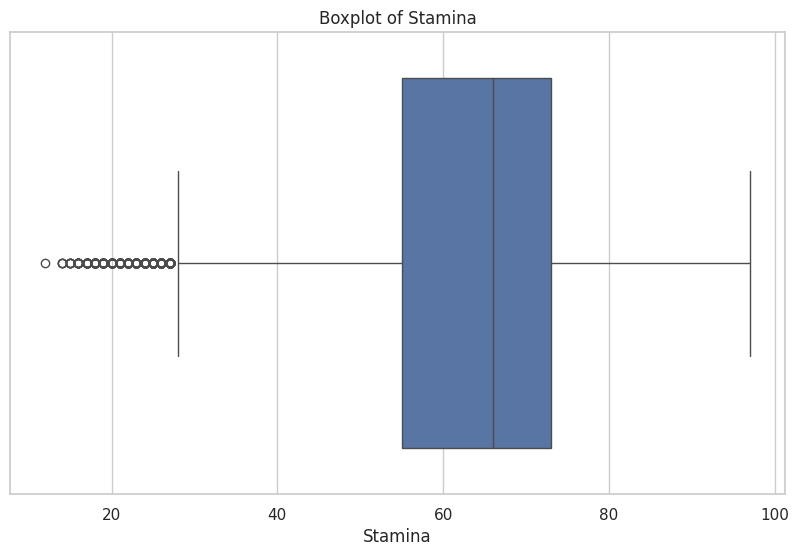

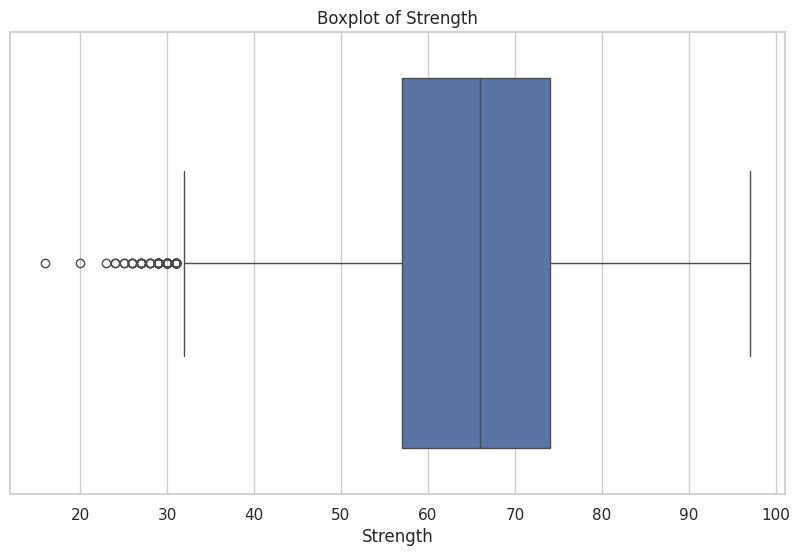

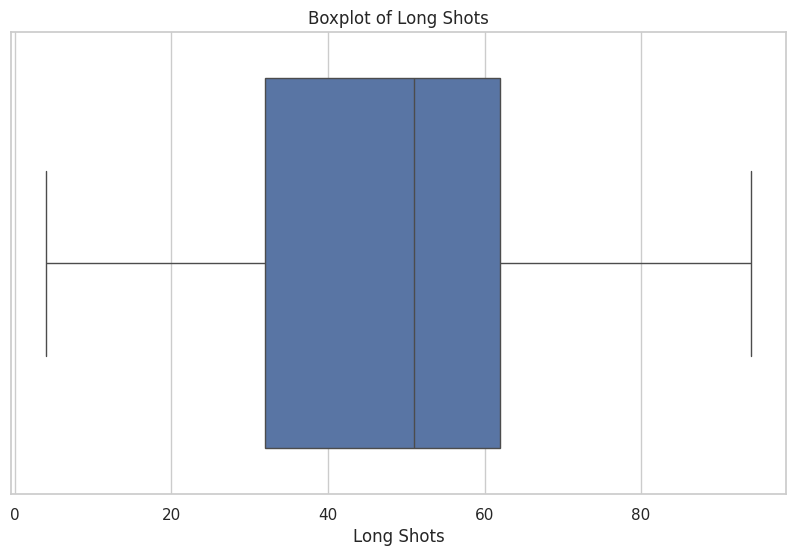

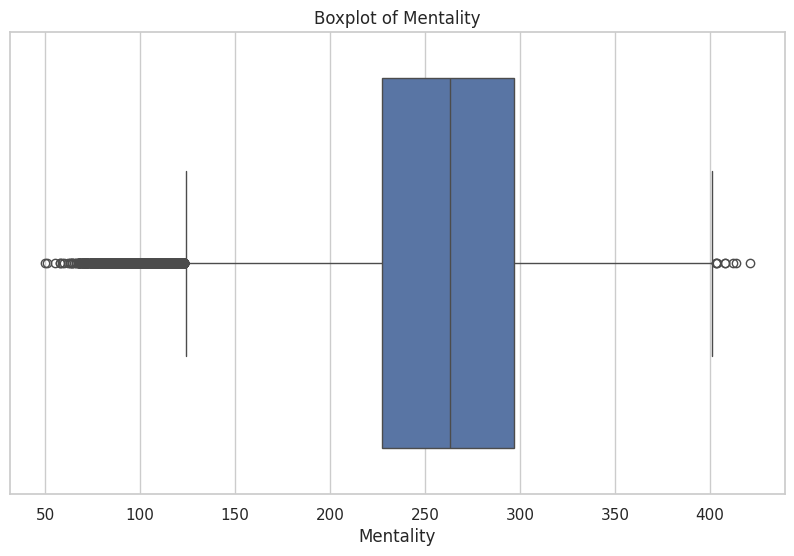

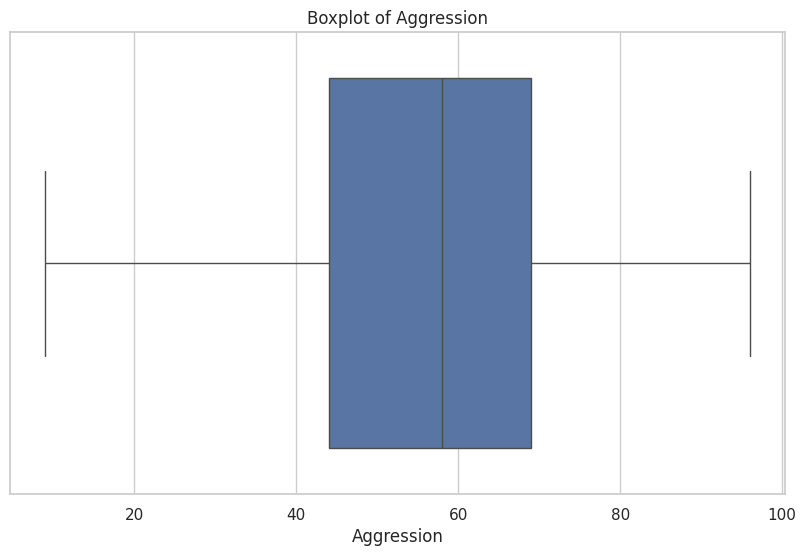

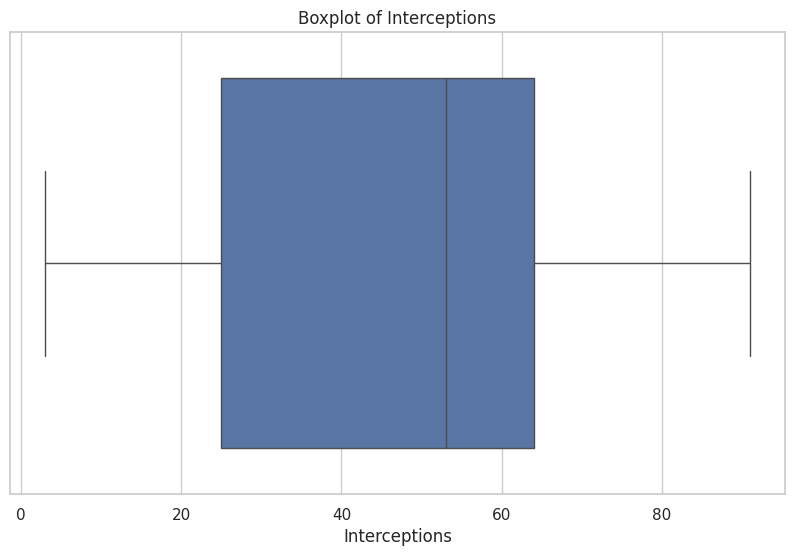

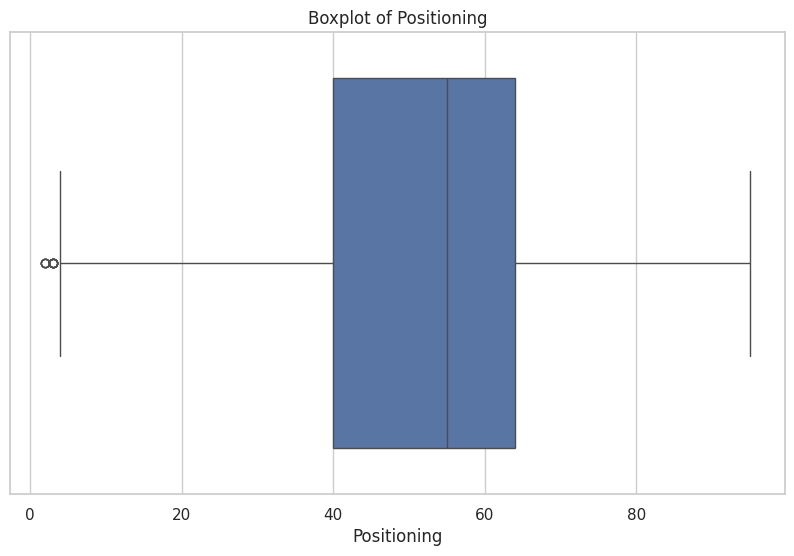

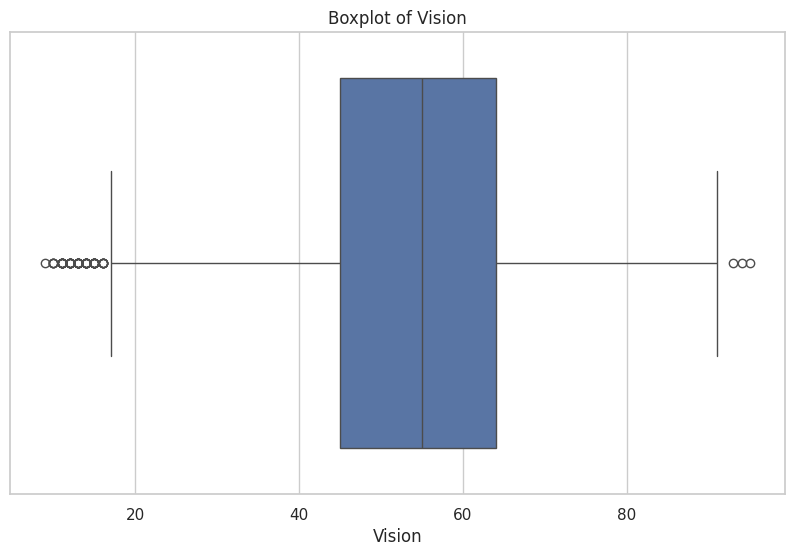

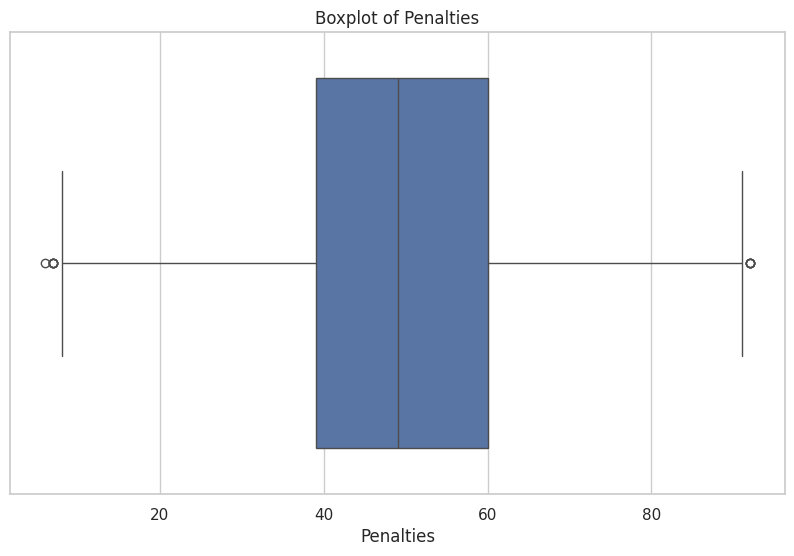

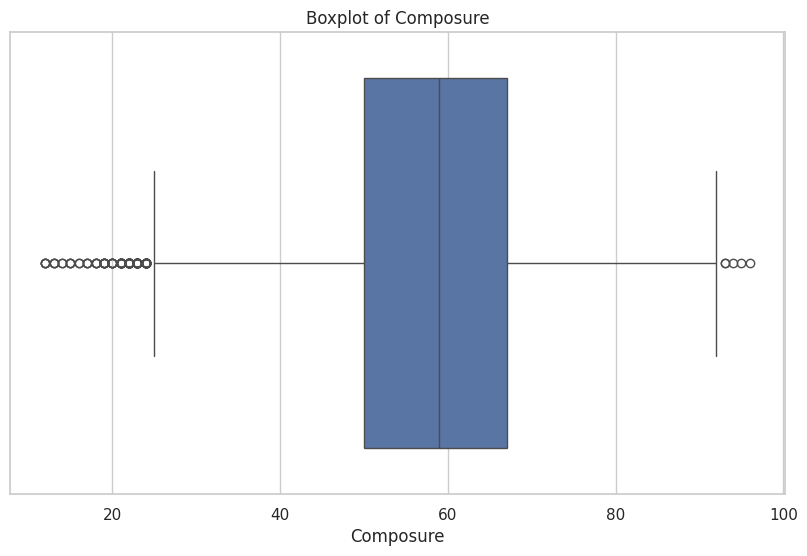

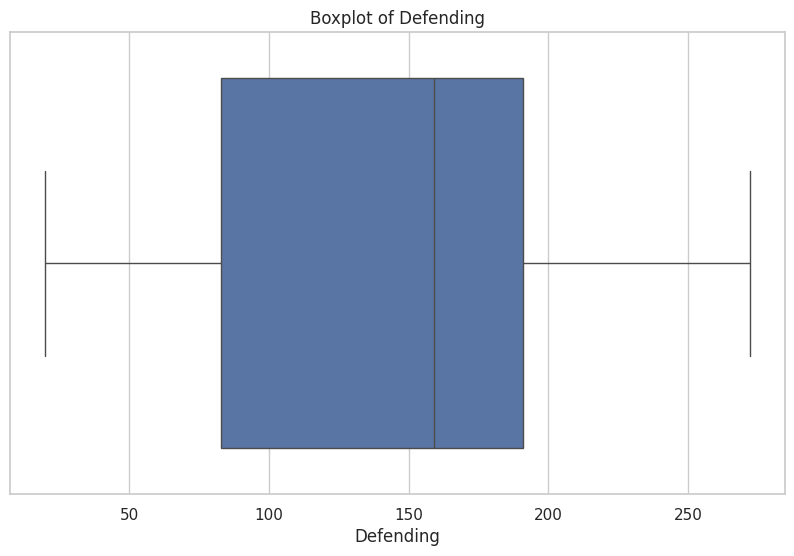

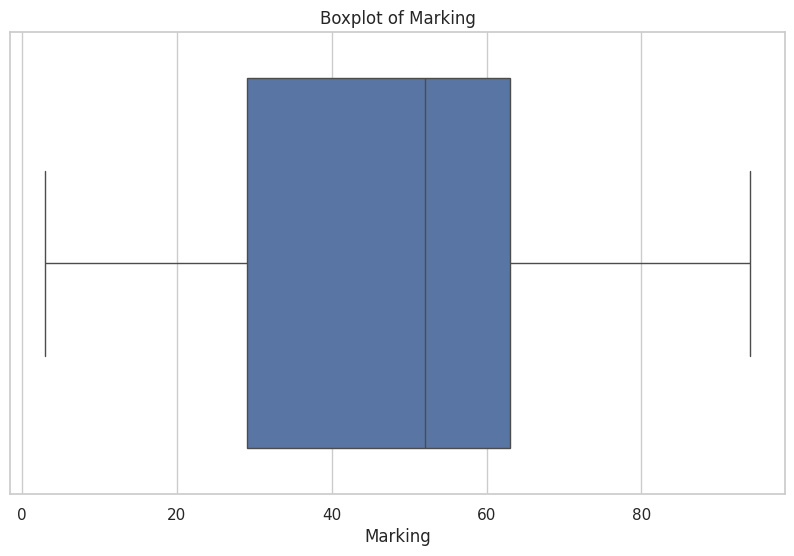

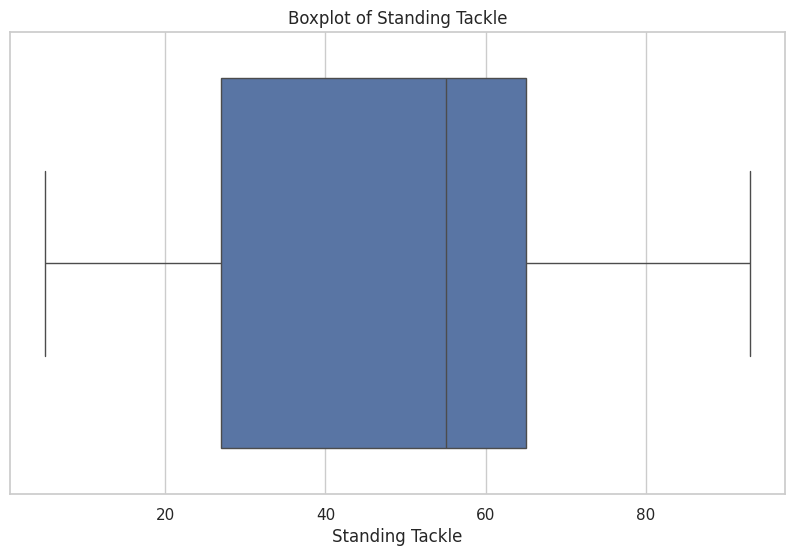

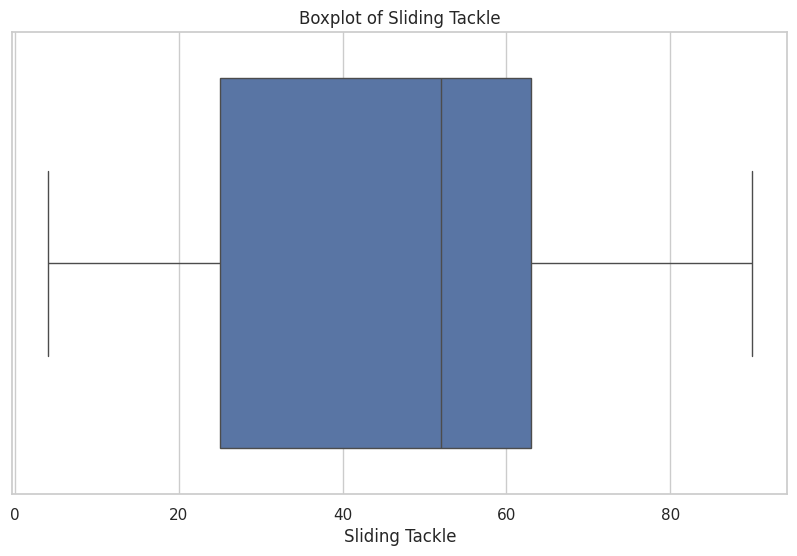

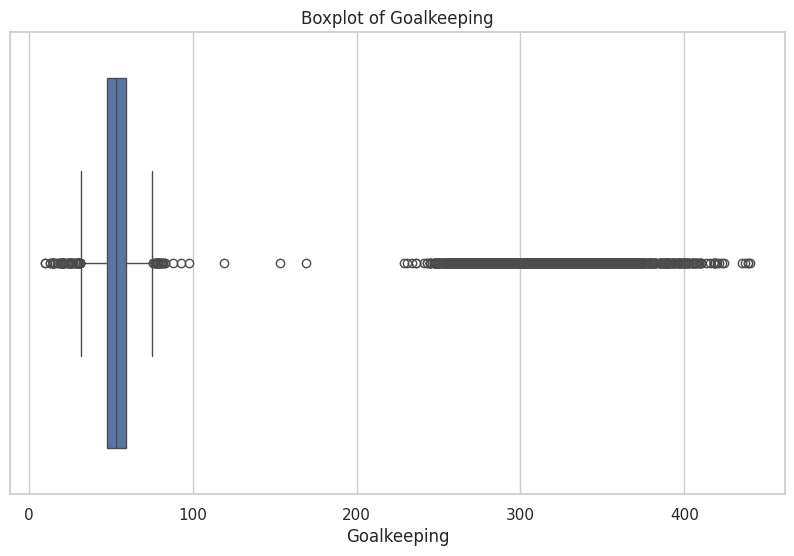

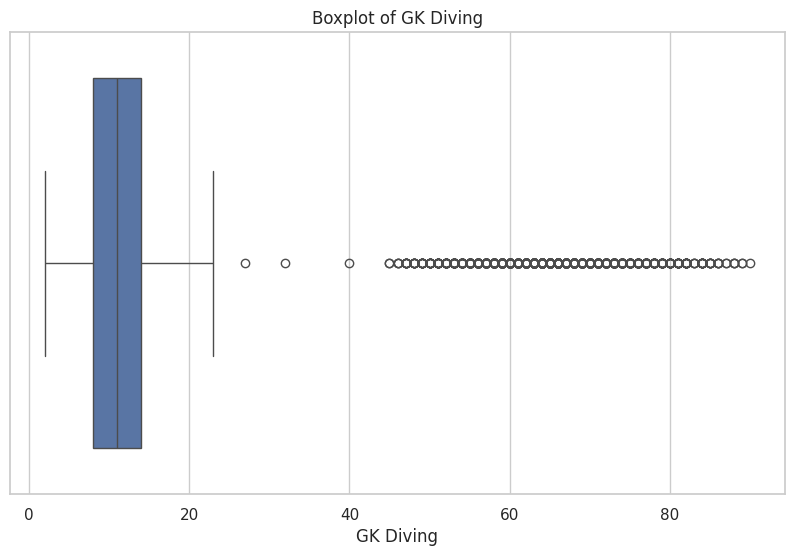

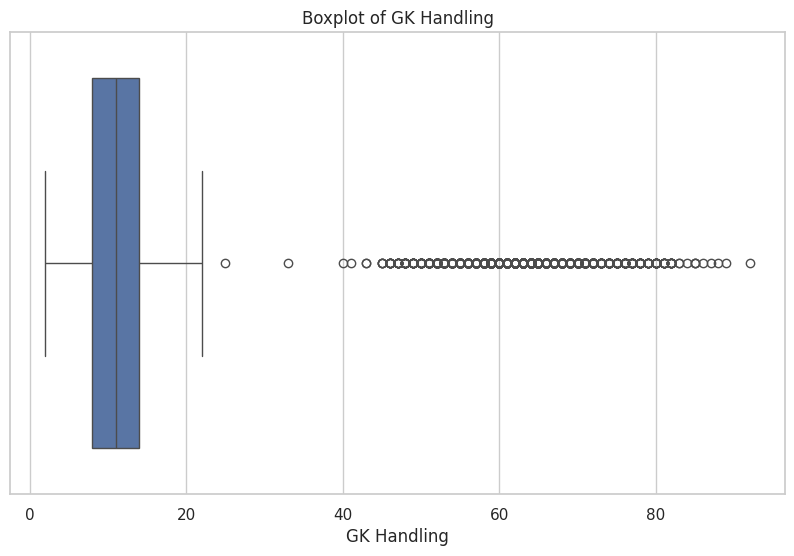

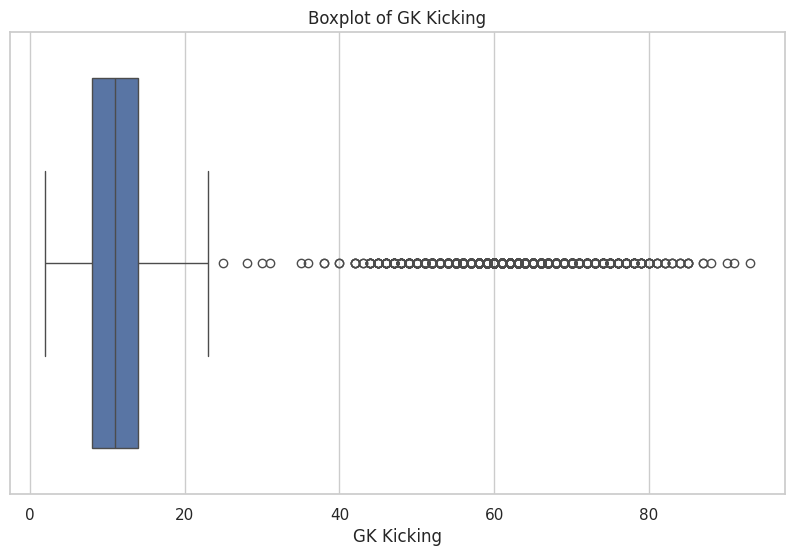

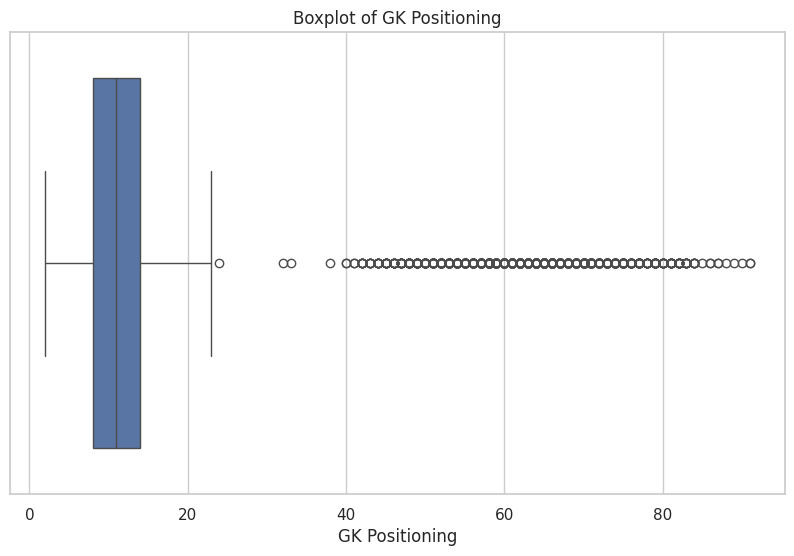

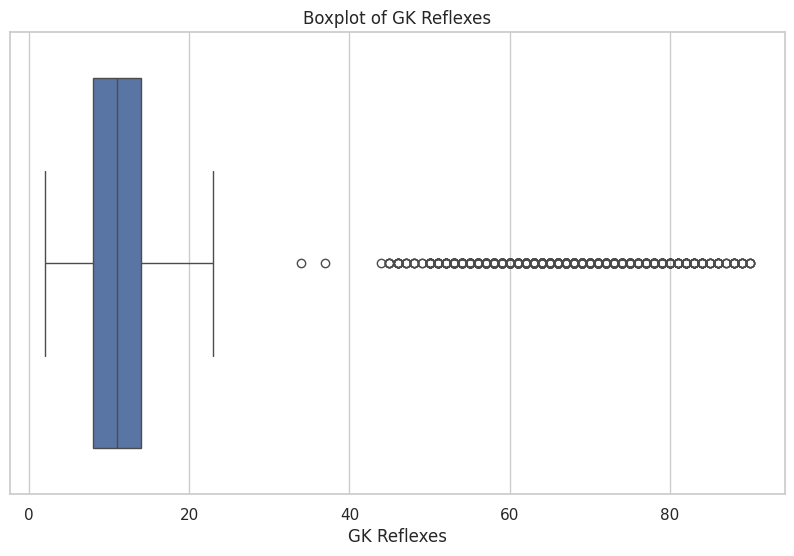

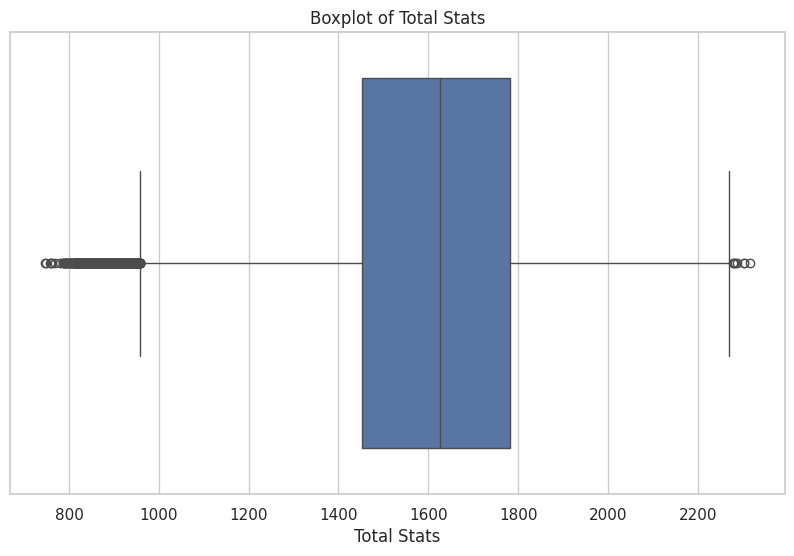

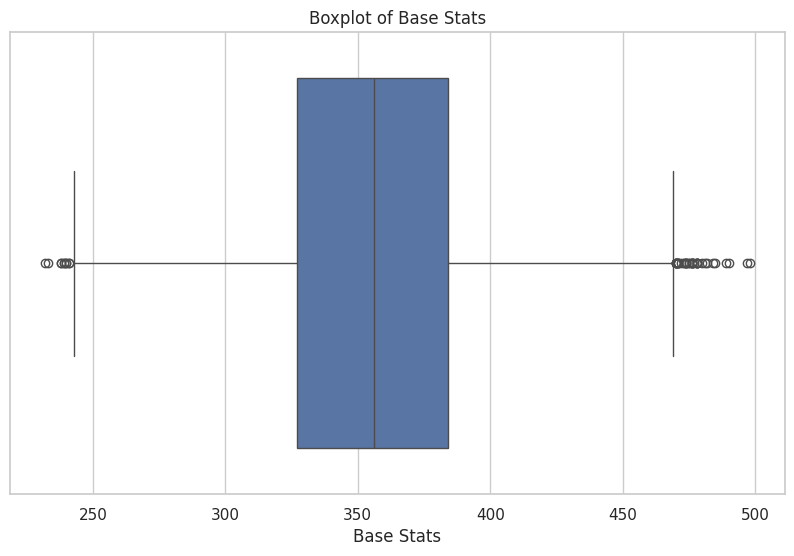

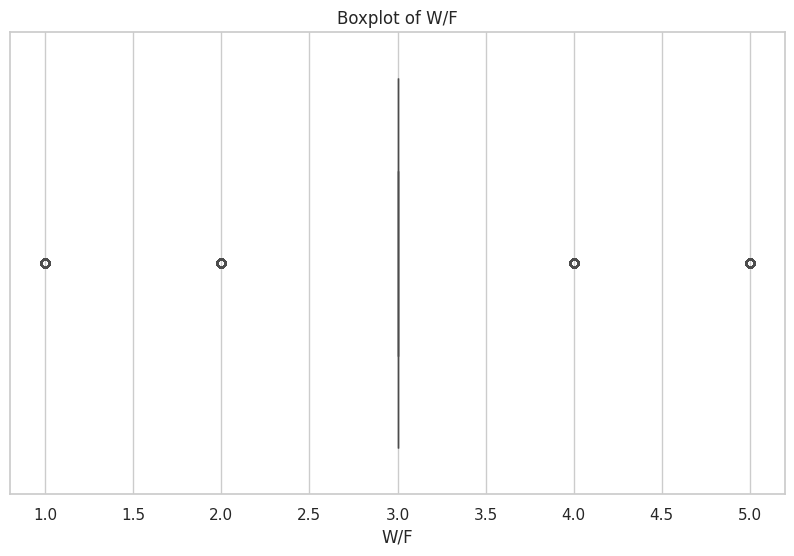

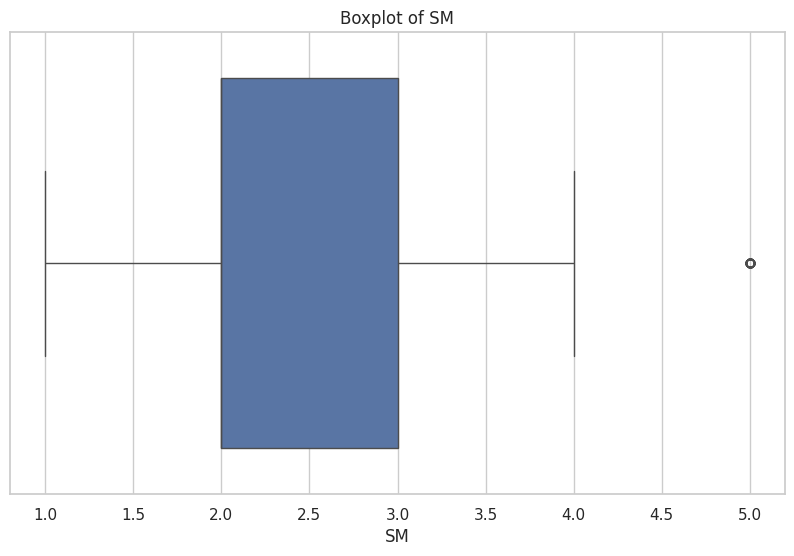

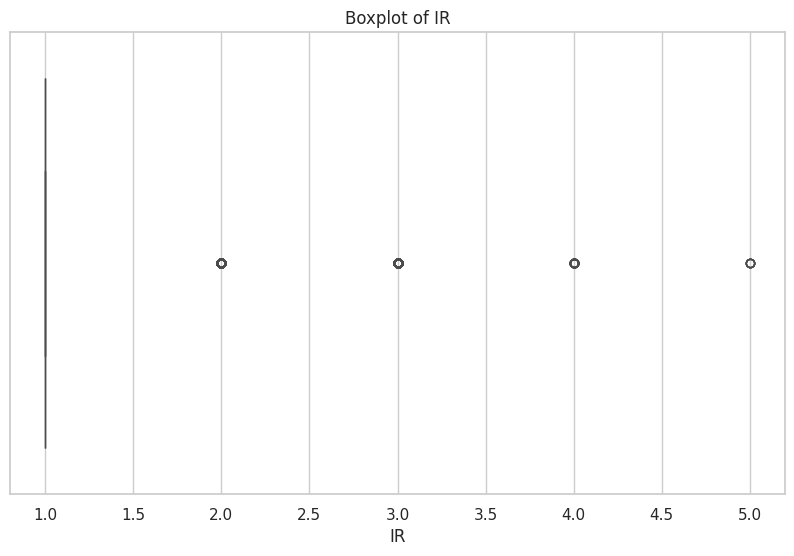

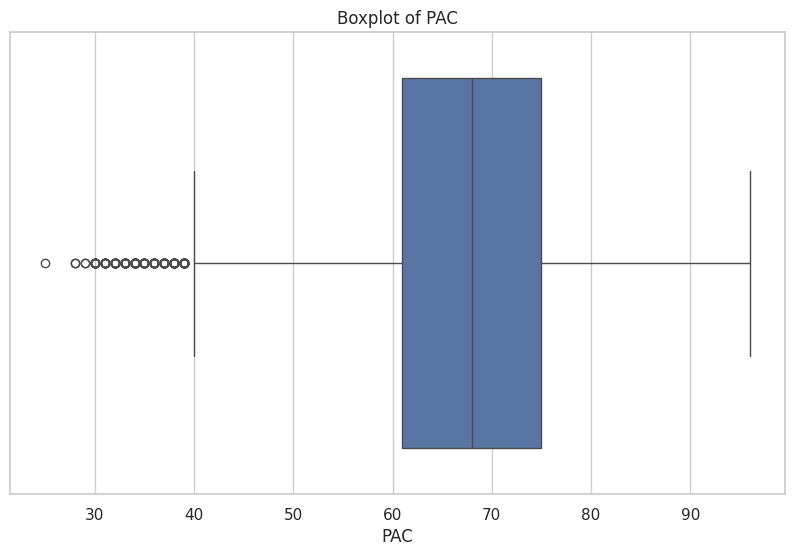

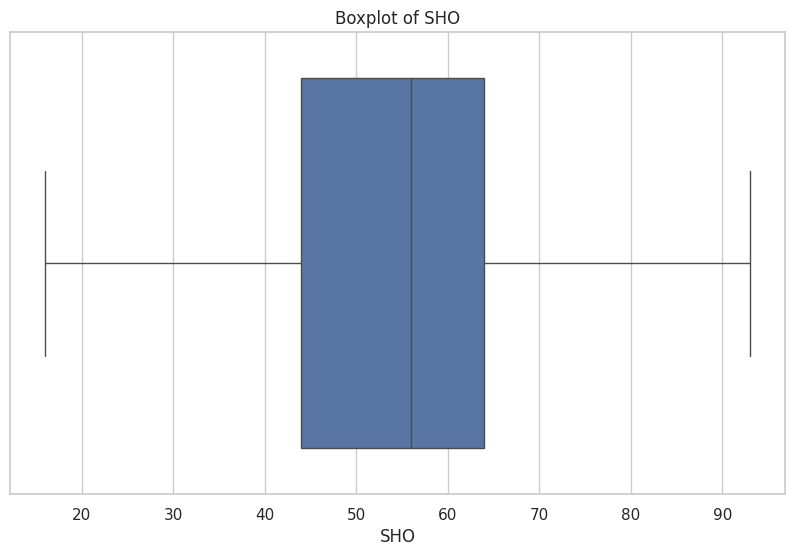

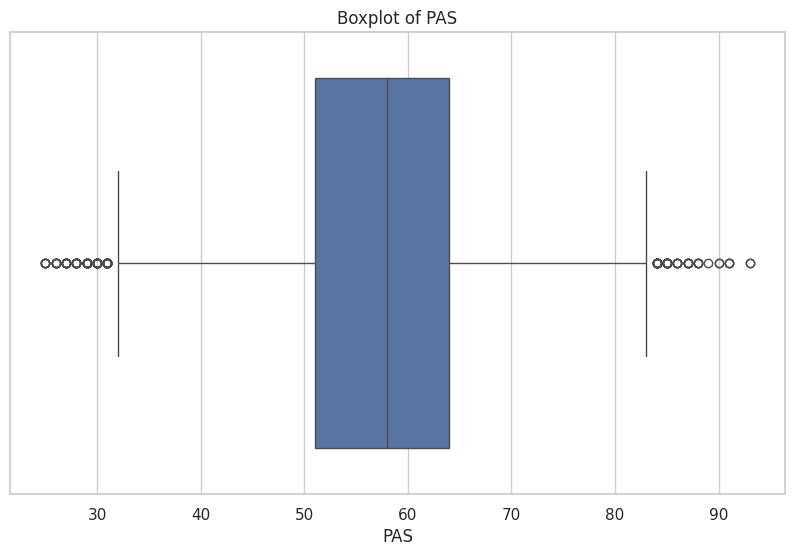

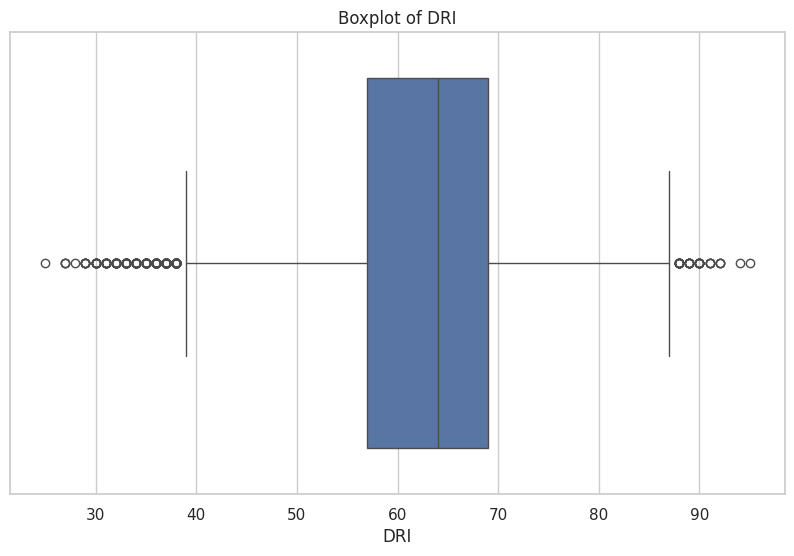

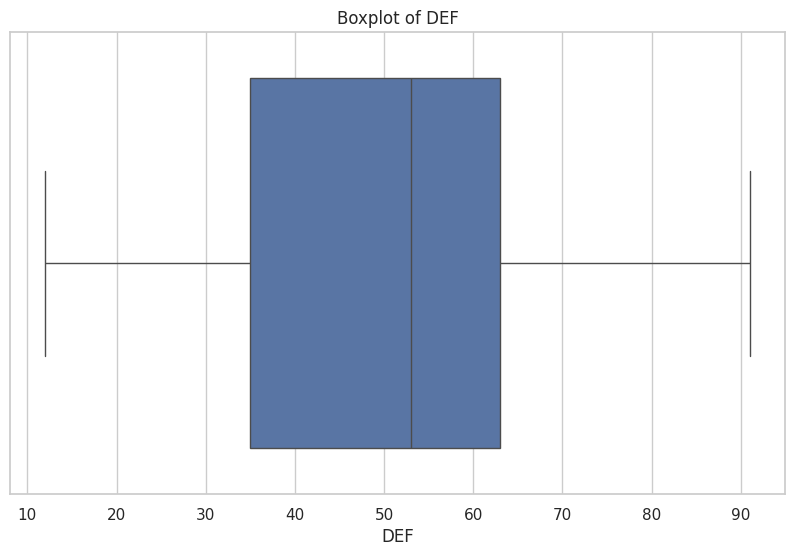

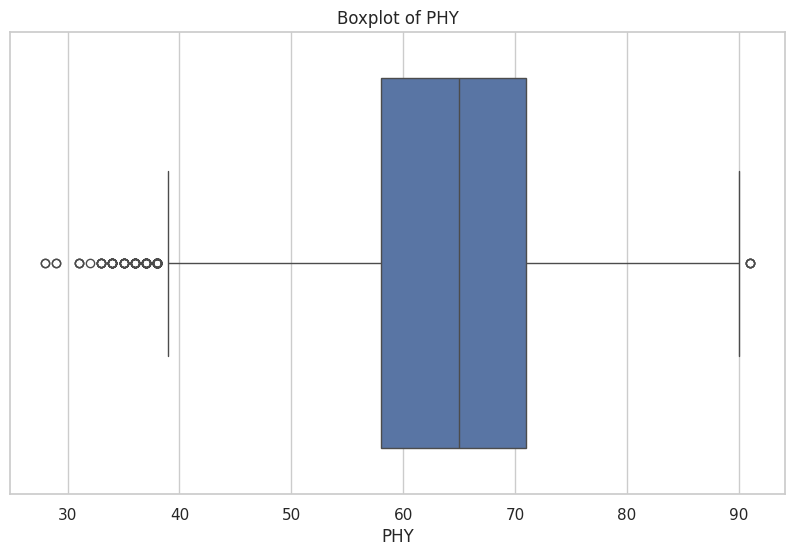

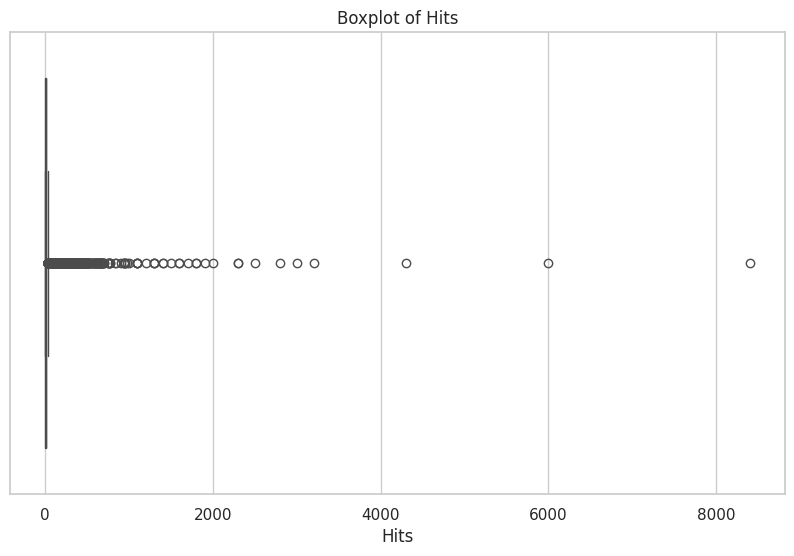

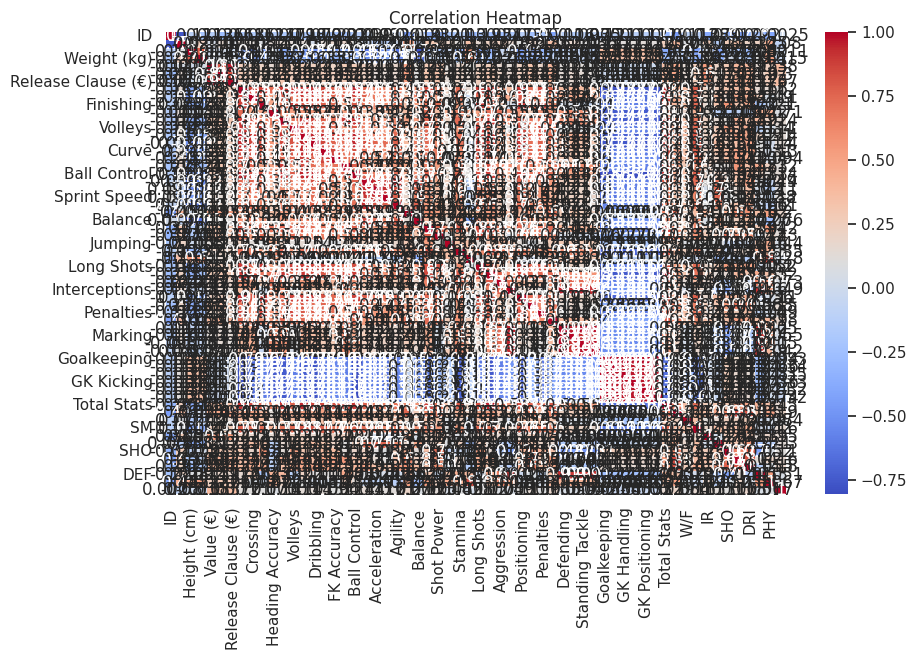

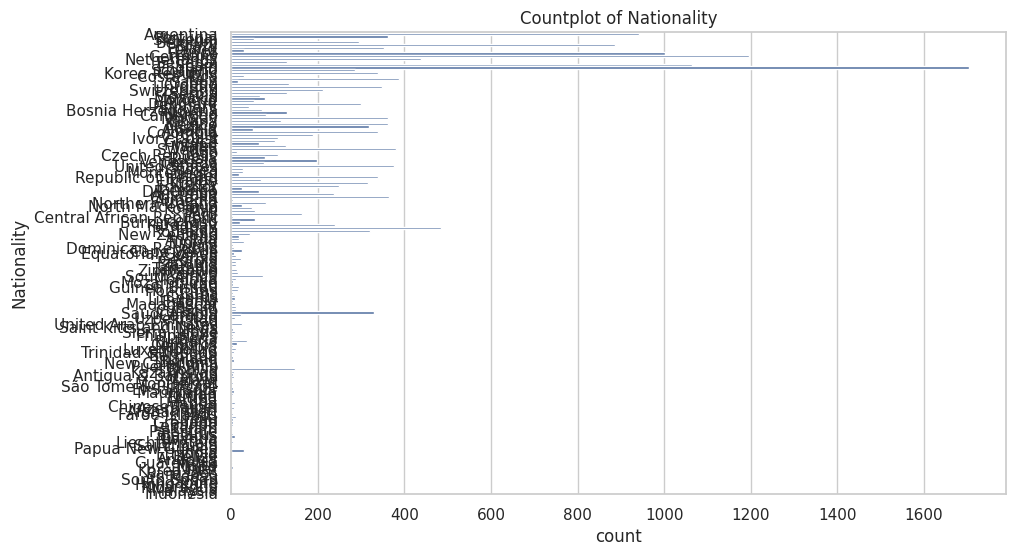

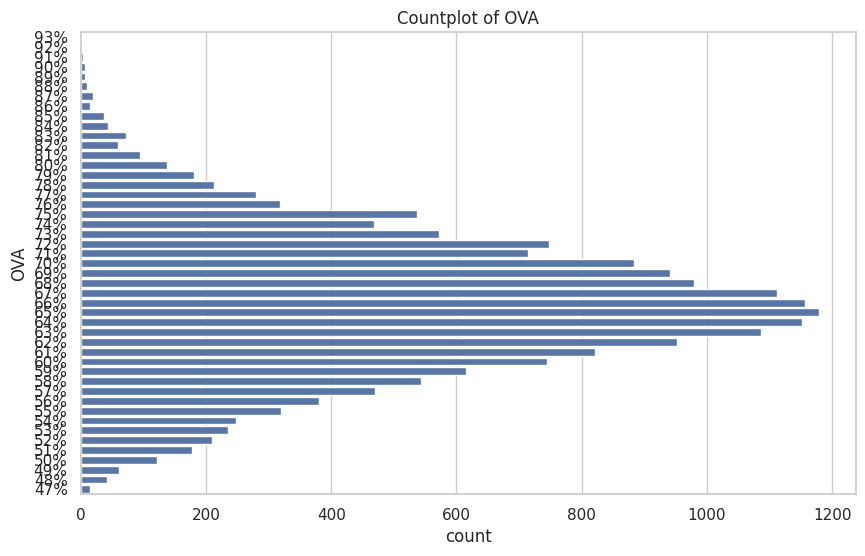

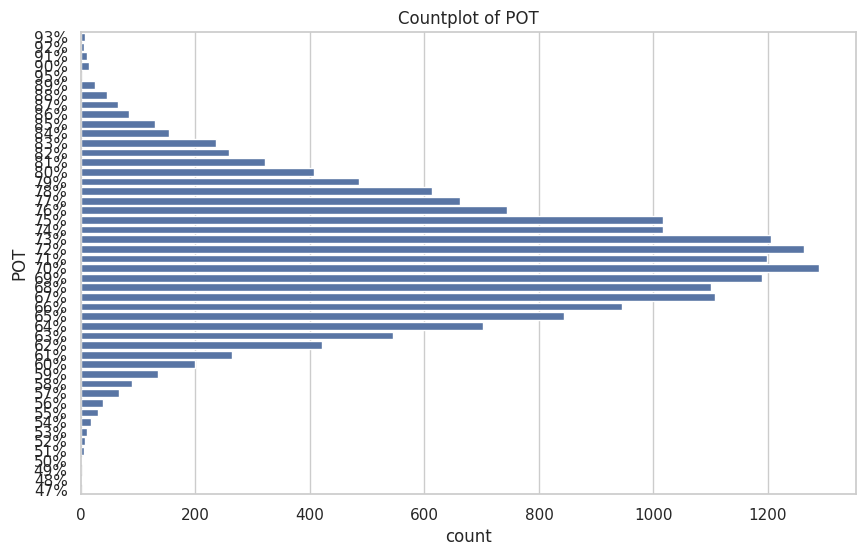

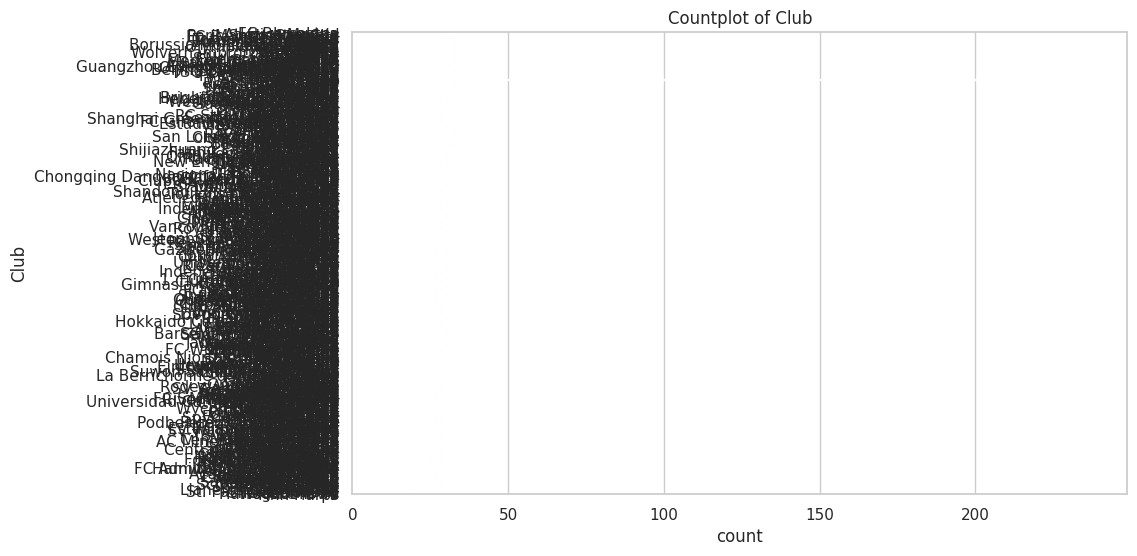

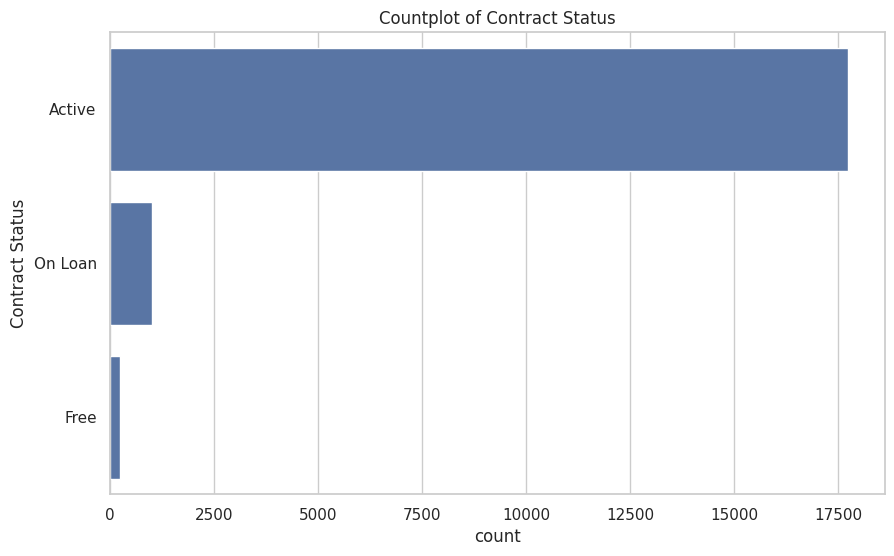

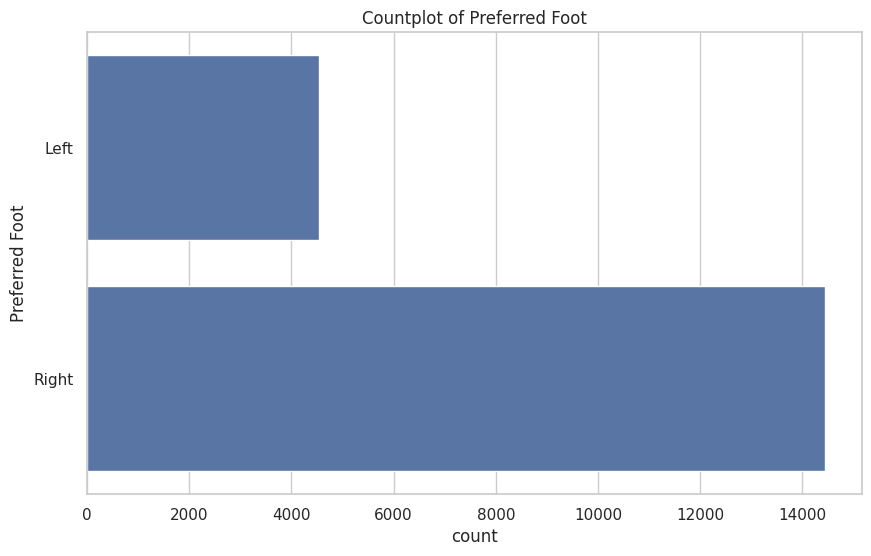

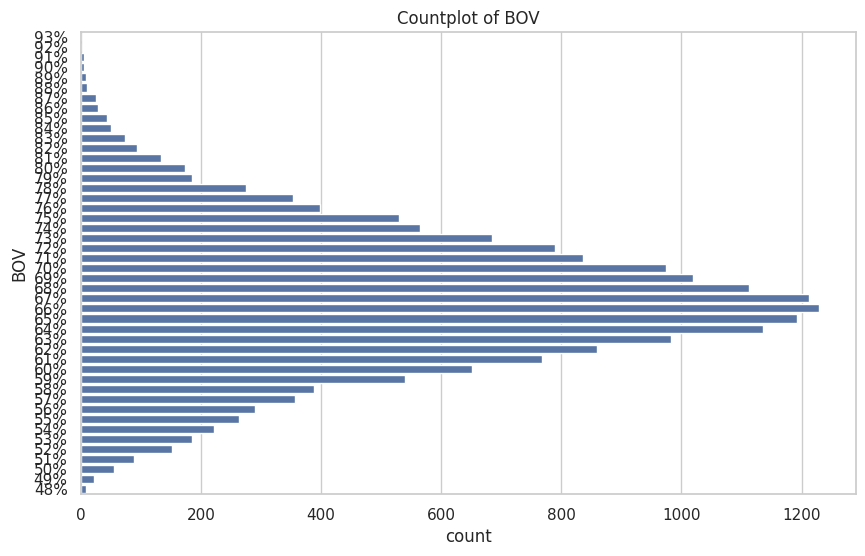

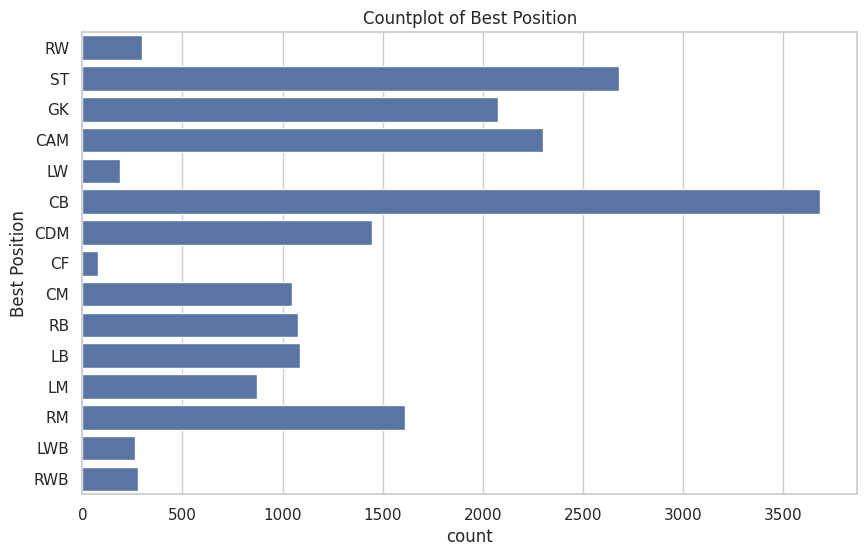

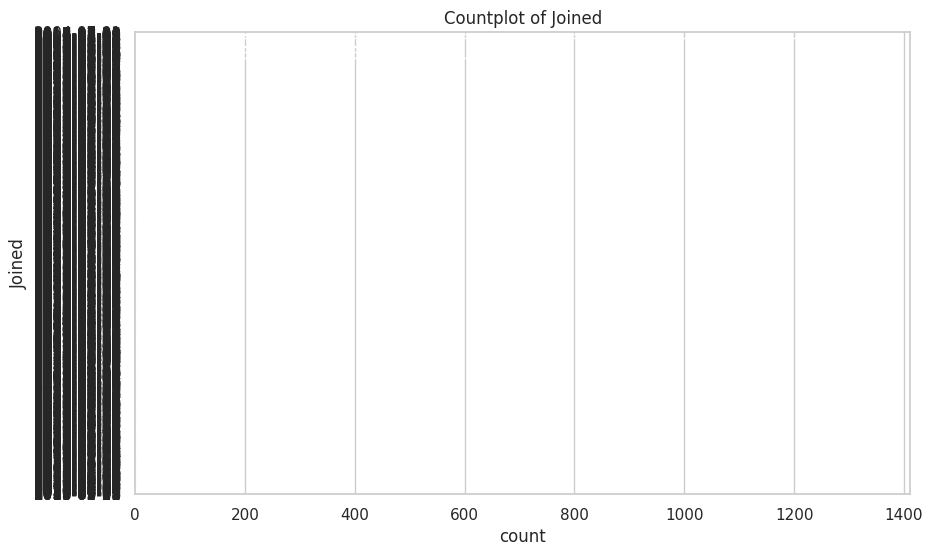

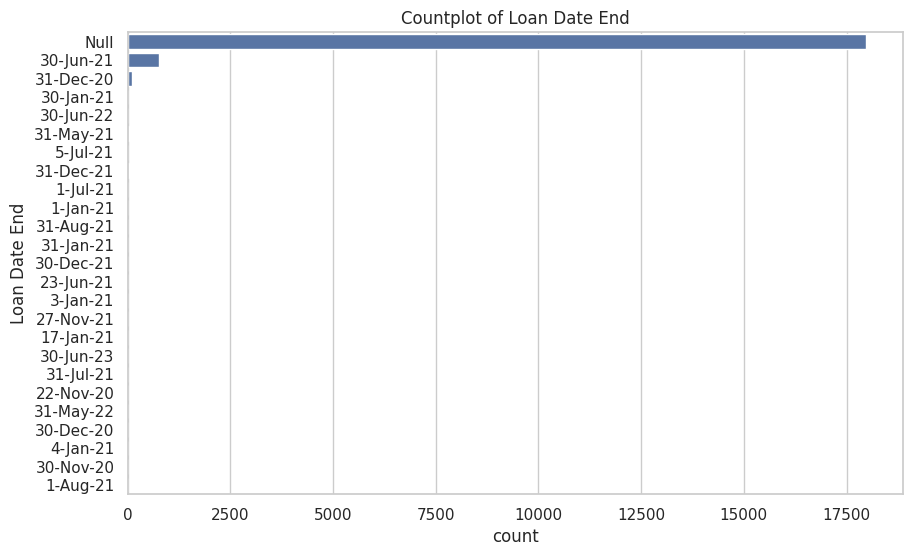

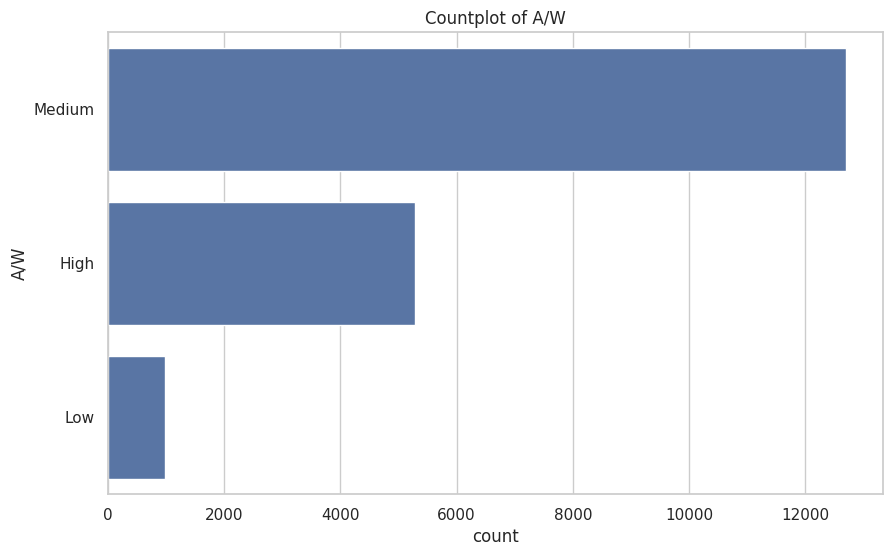

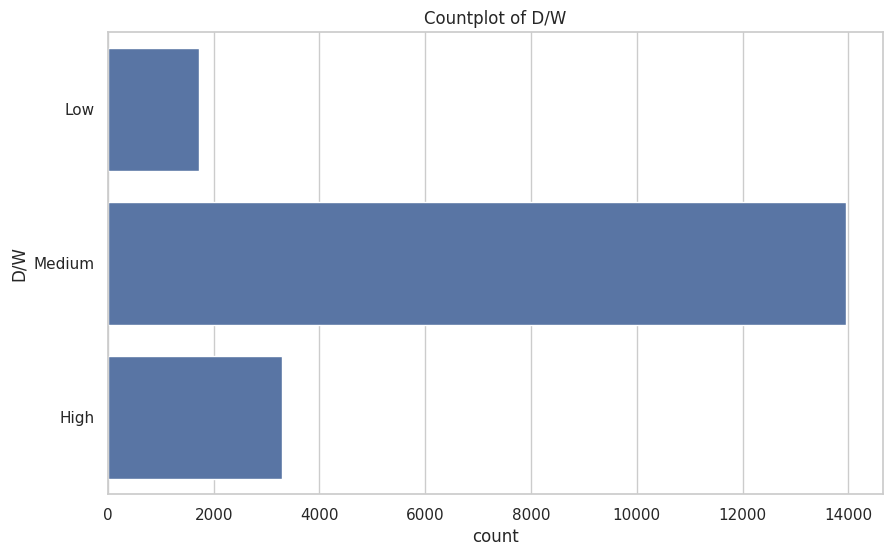

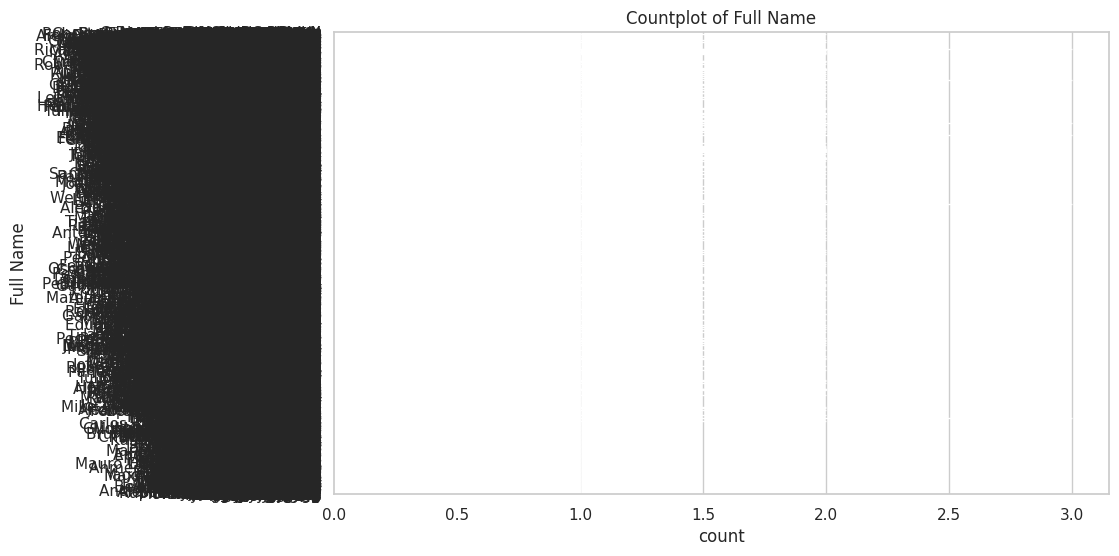

KeyboardInterrupt: 

In [1]:
# Full Data Cleaning and Visualization Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

def load_data(file_path):
    """Load data based on file type"""
    ext = os.path.splitext(file_path)[1].lower()
    if ext == '.csv':
        return pd.read_csv(file_path)
    elif ext in ['.xls', '.xlsx']:
        return pd.read_excel(file_path)
    elif ext == '.json':
        return pd.read_json(file_path)
    elif ext == '.parquet':
        return pd.read_parquet(file_path)
    elif ext == '.txt':
        return pd.read_csv(file_path, delimiter="\t")
    else:
        raise ValueError("Unsupported file type")

def clean_data(df):
    """Basic cleaning: handle missing values, duplicates, and type conversion"""
    print("Initial Data Shape:", df.shape)

    # Drop duplicates
    df = df.drop_duplicates()

    # Fill or drop missing values
    for col in df.columns:
        if df[col].dtype in ['int64','float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Convert object columns with numeric data
    for col in df.select_dtypes(include='object').columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

    print("Data Shape after cleaning:", df.shape)
    return df

def summarize_data(df):
    """Basic summary of the dataset"""
    print("\n--- Data Info ---")
    print(df.info())
    print("\n--- Missing Values ---")
    print(df.isnull().sum())
    print("\n--- Statistics ---")
    print(df.describe())
    print("\n--- Duplicates ---")
    print(df.duplicated().sum())

def plot_graphs(df):
    """Generate all common graphs"""

    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # 1. Histogram for numeric columns
    for col in numeric_cols:
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.show()

    # 2. Boxplot for numeric columns
    for col in numeric_cols:
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

    # 3. Correlation Heatmap
    if len(numeric_cols) > 1:
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()

    # 4. Countplot for categorical columns
    for col in categorical_cols:
        sns.countplot(y=df[col])
        plt.title(f'Countplot of {col}')
        plt.show()

    # 5. Pairplot
    if len(numeric_cols) > 1:
        sns.pairplot(df[numeric_cols])
        plt.show()

    # 6. Interactive plots with Plotly
    for col in numeric_cols:
        fig = px.histogram(df, x=col, marginal="box", title=f'Interactive Histogram of {col}')
        fig.show()

    for col in categorical_cols:
        fig = px.bar(df[col].value_counts().reset_index(), x='index', y=col,
                     title=f'Interactive Bar Plot of {col}')
        fig.show()

def main():
    file_path = input("Enter the path of your dataset: ")

    try:
        df = load_data(file_path)
        summarize_data(df)
        df_cleaned = clean_data(df)
        plot_graphs(df_cleaned)
    except Exception as e:
        print("Error:", e)

if __name__ == "__main__":
    main()
